# **Import Libraries**

In [ ]:
# install ta-lib.
# Code from here https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab?newreg=5d6b616eb23c4a2f9f6e78a8c948d56d
# url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
# !curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
# url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py39hd257fcd_4.tar.bz2'
# !curl -L $url | tar xj -C /usr/local/lib/python3.9/dist-packages/ lib/python3.9/site-packages/talib --strip-components=3
# import talib

In [ ]:
!pip install numpy==1.23.0 --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
!pip install tune-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 38.3 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.54.0
    Uninstalling grpcio-1.54.0:
      Successfully uninstalled grpcio-1.54.0


In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.26-cp310-cp310-linux_x86_64.whl size=2239156 sha256=0303748584964eea7c664c8b6a2

In [ ]:
import numpy as np
import pandas as pd
import time
import talib as ta
import lightgbm as lgb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.utils import shuffle
from lightgbm.sklearn import LGBMRegressor
from tune_sklearn import TuneSearchCV
from scipy.stats import randint
from tune_sklearn import TuneGridSearchCV

# **Import Data**

In [ ]:
!gdown 1bPkBV-ABHgZAKYCwCSxOUWt9Paizzb2p
df_data = pd.read_csv("dichvucongcong.csv")

Downloading...
From: https://drive.google.com/uc?id=1bPkBV-ABHgZAKYCwCSxOUWt9Paizzb2p
To: /content/dichvucongcong.csv
100% 9.49M/9.49M [00:00<00:00, 85.8MB/s]


In [ ]:
# columns info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52933 entries, 0 to 52932
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      52933 non-null  int64  
 1   code            52933 non-null  object 
 2   date            52933 non-null  object 
 3   time            52933 non-null  object 
 4   floor           52933 non-null  object 
 5   type            52933 non-null  object 
 6   basicPrice      52933 non-null  float64
 7   ceilingPrice    52933 non-null  float64
 8   floorPrice      52933 non-null  float64
 9   open            52933 non-null  float64
 10  high            52933 non-null  float64
 11  low             52933 non-null  float64
 12  close           52933 non-null  float64
 13  average         52933 non-null  float64
 14  adOpen          52933 non-null  float64
 15  adHigh          52933 non-null  float64
 16  adLow           52933 non-null  float64
 17  adClose         52933 non-null 

In [ ]:
# df_data unique values count
df_data.nunique()

Unnamed: 0        52933
code                 53
date               1252
time                110
floor                 3
type                  1
basicPrice         1124
ceilingPrice       1179
floorPrice         1084
open               1096
high               1110
low                1122
close              1109
average            6642
adOpen             5374
adHigh             5343
adLow              5304
adClose            5259
adAverage         10106
nmVolume           7513
nmValue           14746
ptVolume            762
ptValue            1395
change              303
adChange           3909
pctChange          5477
snapshot_date      1252
vietnameseName        1
dtype: int64

In [ ]:
# inspecting snapshot_date and date
df_data['snapshot_date'].equals(df_data['date'])

True

In [ ]:
# drop uneccessary columns
df_data = df_data.drop(columns=['Unnamed: 0', 'vietnameseName', 'type', 'snapshot_date'], axis=1)

In [ ]:
df_data['date'] = pd.to_datetime(df_data['date'])

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52933 entries, 0 to 52932
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          52933 non-null  object        
 1   date          52933 non-null  datetime64[ns]
 2   time          52933 non-null  object        
 3   floor         52933 non-null  object        
 4   basicPrice    52933 non-null  float64       
 5   ceilingPrice  52933 non-null  float64       
 6   floorPrice    52933 non-null  float64       
 7   open          52933 non-null  float64       
 8   high          52933 non-null  float64       
 9   low           52933 non-null  float64       
 10  close         52933 non-null  float64       
 11  average       52933 non-null  float64       
 12  adOpen        52933 non-null  float64       
 13  adHigh        52933 non-null  float64       
 14  adLow         52933 non-null  float64       
 15  adClose       52933 non-null  float6

In [ ]:
# Select 5 stocks from UPCOM
col = df_data.columns
temp_selected_data = df_data[col]
# df_upcom = temp_selected_data.loc[(df_data['code'] == 'BWA') | (df_data['code'] == 'DVC') |
#          (df_data['code'] == 'HFC') | (df_data['code'] == 'HTW') |(df_data['code'] == 'LAW')
#          |(df_data['code'] == 'MTG') |(df_data['code'] == 'QPH')]
df_upcom = temp_selected_data.loc[(df_data['code'] == 'BWA') | (df_data['code'] == 'DVC') |
         (df_data['code'] == 'HFC') |(df_data['code'] == 'MTG') |(df_data['code'] == 'QPH')]

In [ ]:
df_upcom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 3 to 52930
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          6260 non-null   object        
 1   date          6260 non-null   datetime64[ns]
 2   time          6260 non-null   object        
 3   floor         6260 non-null   object        
 4   basicPrice    6260 non-null   float64       
 5   ceilingPrice  6260 non-null   float64       
 6   floorPrice    6260 non-null   float64       
 7   open          6260 non-null   float64       
 8   high          6260 non-null   float64       
 9   low           6260 non-null   float64       
 10  close         6260 non-null   float64       
 11  average       6260 non-null   float64       
 12  adOpen        6260 non-null   float64       
 13  adHigh        6260 non-null   float64       
 14  adLow         6260 non-null   float64       
 15  adClose       6260 non-null   float64

# **LightGBM Forecasting**

## **Main Functions**

***Function to compute technincal indicators***

In [ ]:
# function to compute technical indicators for adjusted close price

def func_compute_technical_indicators(data):
    # one-period-pct-change of close price
    data['adclose_pct_1'] = data['adClose'].pct_change()
    data['adclose_diff_1'] = data['adClose'].diff()
    data['close_pct_1'] = data['close'].pct_change()

    # shift diff column backward once to show the relationship of value at
    # time t-1 and diff of value between t-1 and t
    data["close_diff_1_shift_back_1"] = data['close_diff_1'].shift(-1)
    data["adAverage_diff_1_shift_back_1"] = data['adAverage_diff_1'].shift(-1)
    data['adclose_diff_1_shift_back_1'] = data['adclose_diff_1'].shift(-1)

    # shift pct change column backward once to show the relationship of value at
    # time t-1 and pctn change of value between t-1 and t
    data["adclose_pct_1_shift_back_1"] = data['adclose_pct_1'].shift(-1)
    data["adAverage_pct_1_shift_back_1"] = data['adAverage_pct_1'].shift(-1)
    data['close_pct_1_shift_back_1'] = data['close_pct_1'].shift(-1)

    # SMA 10 và 20
    data['SMA_10'] = data['adClose'].rolling(window=10).mean()
    data['SMA_20'] = data['adClose'].rolling(window=20).mean()

    # RSI
    data['RSI'] = ta.RSI(data['adClose'].values, timeperiod=14)

    # Stoch
    data['Stoch'] = ta.STOCH(data['high'].values, data['low'].values, data['adClose'].values)[0]

    # create lagged features
    data['adClose_Lag1'] = data['adClose'].shift(1)
    data['adClose_Lag2'] = data['adClose'].shift(2)

    # volume-based features
    data['VWAP'] = data['nmVolume'] * data['adClose'] / data['nmVolume'].rolling(window=10).sum()
    data['ADL'] = ta.AD(data['high'].values, data['low'].values, data['adClose'].values, data['nmVolume'].values)

    # Calculate the Bollinger Bands with a period of 20 and two standard deviations
    upper, middle, lower = ta.BBANDS(data['adClose'], timeperiod=20, nbdevup=2, nbdevdn=2)
    data['Upper_Band'] = upper
    data['Middle_Band'] = middle
    data['Lower_Band'] = lower

    # Calculate the Moving Average Convergence Divergence (MACD) with default parameters
    macd, macdsignal, macdhist = ta.MACD(data['adClose'])
    data['MACD'] = macd

    # Calculate the Stochastic Oscillator with a period of 14
    slowk, slowd = ta.STOCH(data['high'], data['low'], data['adClose'], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    data['%K'] = slowk
    data['%D'] = slowd

    # Calculate the Momentum Oscillator with a period of 10

    mom = ta.MOM(data['adClose'], timeperiod=10)
    data['MoM'] = mom

    return data


***Function to perform a baseline model with fixed parameters on a 10-fold cross validation to assess its performance***

In [ ]:
def func_baseline_forecast(df_train, params):

    # specify features and target
    features = df_train.columns.drop('adClose')
    target = 'adClose'

    # create time series cross-validator
    tscv = TimeSeriesSplit(n_splits=10)

    # create empty dataframe to store results
    df_baseline_results = pd.DataFrame(columns=['Fold', 'Train_R2', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_MAPE', 'Train_RSE',
                                       'Test_R2', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_MAPE', 'Test_RSE'])

    # loop over time series cross-validation splits
    for i, (train_idx, test_idx) in enumerate(tscv.split(df_train)):
        # split data into train and test sets for this fold
        train_data = df_train.iloc[train_idx]
        test_data = df_train.iloc[test_idx]

        # compute technical indicators for this fold
        train_data = func_compute_technical_indicators(train_data)
        test_data = func_compute_technical_indicators(test_data)

        # create LGBM dataset for this fold
        train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
        test_dataset = lgb.Dataset(test_data[features], label=test_data[target])

        # train model for this fold
        baseline_model = lgb.train(params, train_dataset, num_boost_round=100)

        # make predictions on train and test data for this fold
        train_data['forecast'] = baseline_model.predict(train_data[features])
        test_data['forecast'] = baseline_model.predict(test_data[features])

        # calculate metrics for train data
        train_r2 = r2_score(train_data[target], train_data['forecast'])
        train_mae = mean_absolute_error(train_data[target], train_data['forecast'])
        train_mse = mean_squared_error(train_data[target], train_data['forecast'])
        train_rmse = np.sqrt(train_mse)
        train_mape = np.mean(np.abs((train_data[target] - train_data['forecast']) / train_data[target])) * 100
        train_rse = np.sqrt(train_mse / (len(train_data) - 1))

        # calculate metrics for test data
        test_r2 = r2_score(test_data[target], test_data['forecast'])
        test_mae = mean_absolute_error(test_data[target], test_data['forecast'])
        test_mse = mean_squared_error(test_data[target], test_data['forecast'])
        test_rmse = np.sqrt(test_mse)
        test_mape = np.mean(np.abs((test_data[target] - test_data['forecast']) / test_data[target])) * 100
        test_rse = np.sqrt(test_mse / (len(test_data) - 1))

        # append results to dataframe
        df_baseline_results = df_baseline_results.append({'Fold': i+1,
                                        'Train_R2': train_r2,
                                        'Train_MAE': train_mae,
                                        'Train_MSE': train_mse,
                                        'Train_RMSE': train_rmse,
                                        'Train_MAPE': train_mape,
                                        'Train_RSE': train_rse,
                                        'Test_R2': test_r2,
                                        'Test_MAE': test_mae,
                                        'Test_MSE': test_mse,
                                        'Test_RMSE': test_rmse,
                                        'Test_MAPE': test_mape,
                                        'Test_RSE': test_rse}, ignore_index=True)
    return df_baseline_results, baseline_model, features, target

***Function to perform forecasting on test data by using baseline model and plot the forecasted result versus actual values***

In [ ]:
def func_plot_baseline_predict(df_test, model, features, target):
  # make predictions on test data
  df_test['forecast'] = model.predict(df_test[features])

  # plot actual vs forecasted values
  plt.figure(figsize=(10,5))
  plt.plot(df_test[target], label='Actual')
  plt.plot(df_test['forecast'], label='Forecast')
  plt.legend()
  plt.title('Baseline - Actual vs Forecasted Values')
  plt.xlabel('Date')
  plt.ylabel('adClose')
  plt.show()

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(df_test[target], df_test['forecast'])

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(df_test[target], df_test['forecast'])

  # Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((df_test[target] - df_test['forecast']) / df_test[target])) * 100

  # Calculate Root Mean Squared Error (RMSE)
  rmse = mean_squared_error(df_test[target], df_test['forecast'], squared=False)

  print("MAE:", mae)
  print("MSE:", mse)
  print("MAPE:", mape)
  print("RMSE:", rmse)

***Function to perform a model with fixed parameters on train and test data***

In [ ]:
def func_lgb_model_train_test(df_train, df_test, params):
  # specify features and target
  features = df_train.columns.drop('adClose')
  target = 'adClose'

  # create empty dataframe to store results
  df_model_results = pd.DataFrame(columns=['Train_R2', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_MAPE',
                                    'Test_R2', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_MAPE'])

  # compute technical indicators for this fold
  train_data = func_compute_technical_indicators(df_train)
  test_data = func_compute_technical_indicators(df_test)

  # create LGBM dataset for this fold
  train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
  test_dataset = lgb.Dataset(test_data[features], label=test_data[target])

  # train model for this fold
  model = lgb.train(params, train_dataset, num_boost_round=100)

  # make predictions on train and test data for this fold
  train_data['forecast'] = model.predict(train_data[features])
  test_data['forecast'] = model.predict(test_data[features])

  # calculate metrics for train data
  train_r2 = r2_score(train_data[target], train_data['forecast'])
  train_mae = mean_absolute_error(train_data[target], train_data['forecast'])
  train_mse = mean_squared_error(train_data[target], train_data['forecast'])
  train_rmse = np.sqrt(train_mse)
  train_mape = np.mean(np.abs((train_data[target] - train_data['forecast']) / train_data[target])) * 100

  # calculate metrics for test data
  test_r2 = r2_score(test_data[target], test_data['forecast'])
  test_mae = mean_absolute_error(test_data[target], test_data['forecast'])
  test_mse = mean_squared_error(test_data[target], test_data['forecast'])
  test_rmse = np.sqrt(test_mse)
  test_mape = np.mean(np.abs((test_data[target] - test_data['forecast']) / test_data[target])) * 100

  # append results to dataframe
  df_model_results = df_model_results.append({
                                      'Train_R2': train_r2,
                                      'Train_MAE': train_mae,
                                      'Train_MSE': train_mse,
                                      'Train_RMSE': train_rmse,
                                      'Train_MAPE': train_mape,
                                      'Test_R2': test_r2,
                                      'Test_MAE': test_mae,
                                      'Test_MSE': test_mse,
                                      'Test_RMSE': test_rmse,
                                      'Test_MAPE': test_mape}, ignore_index=True)
  # make predictions on test data
  df_test['forecast'] = model.predict(df_test[features])

  # plot actual vs forecasted values
  plt.figure(figsize=(10,5))
  plt.plot(df_test[target], label='Actual')
  plt.plot(df_test['forecast'], label='Forecast')
  plt.legend()
  plt.title('Actual vs Forecasted Values')
  plt.xlabel('Date')
  plt.ylabel('adClose')
  plt.show()

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(df_test[target], df_test['forecast'])

  # Calculate Mean Squared Error (MSE)
  mse = mean_squared_error(df_test[target], df_test['forecast'])

  # Calculate Mean Absolute Percentage Error (MAPE)
  mape = np.mean(np.abs((df_test[target] - df_test['forecast']) / df_test[target])) * 100

  # Calculate Root Mean Squared Error (RMSE)
  rmse = mean_squared_error(df_test[target], df_test['forecast'], squared=False)

  print("MAE:", mae)
  print("MSE:", mse)
  print("MAPE:", mape)
  print("RMSE:", rmse)

  print(df_model_results)

  # print feature importance
  feature_importance = pd.DataFrame({'Feature': model.feature_name(), 'Importance': model.feature_importance()})
  print("Feature Importance:")
  print(feature_importance)

In [ ]:
def func_lgb_model_train_test_feature_importance(df_train, df_test, params):
  # specify features and target
  features = df_train.columns.drop('adClose')
  target = 'adClose'

  # create empty dataframe to store results
  df_model_results = pd.DataFrame(columns=['Train_R2', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_MAPE',
                                    'Test_R2', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_MAPE'])

  # compute technical indicators for this fold
  train_data = func_compute_technical_indicators(df_train)
  test_data = func_compute_technical_indicators(df_test)

  # create LGBM dataset for this fold
  train_dataset = lgb.Dataset(train_data[features], label=train_data[target])
  test_dataset = lgb.Dataset(test_data[features], label=test_data[target])

  # train model for this fold
  model = lgb.train(params, train_dataset, num_boost_round=100)

  # print feature importance
  feature_importance = pd.DataFrame({'Feature': model.feature_name(), 'Importance': model.feature_importance()})
  print("Feature Importance:")
  print(feature_importance)

  # return the model and model results
  return model, df_model_results

***Function to plot learning curve***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, learning_curve

def func_lgb_model_train_test_learning_curve(df_train, params):
    # specify features and target
    features = df_train.columns.drop('adClose')
    target = 'adClose'

    # create LGBM dataset
    train_dataset = lgb.Dataset(df_train[features], label=df_train[target])

    # define time series cross-validation
    tscv = TimeSeriesSplit(n_splits=10)

    # compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(lgb.LGBMRegressor(**params),
                                                             X=df_train[features], y=df_train[target],
                                                             cv=tscv,
                                                            scoring='neg_root_mean_squared_error',
                                                             train_sizes=np.linspace(0.1, 1.0, 10), shuffle=False)

    # calculate mean and standard deviation of train and test scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # plot learning curve based on RMSE
    plt.figure(figsize=(10,5))
    plt.plot(train_sizes, train_mean, label='Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Test')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.legend()
    plt.title('Learning Curve - RMSE')
    plt.xlabel('Training Examples')
    plt.ylabel('RMSE')
    y_min = min(np.min(train_mean), np.min(test_mean)) - 0.1
    y_max = max(np.max(train_mean), np.max(test_mean)) + 0.1
    plt.ylim([y_min, y_max])  # adjust the y-axis scaling based on the range of RMSE values
    plt.show()


***Function to perform hyperparameter tuning***

In [ ]:
def func_cv_tuning(train_data, param_distributions):
    # specify features and target
    features = train_data.columns.drop('adClose')
    target = 'adClose'

    # create time series cross-validator
    tscv = TimeSeriesSplit(n_splits=10)

    # create a dataframe to store the results
    df_best_params_results = pd.DataFrame(columns=["best_params", "rmse"])

    df_train = func_compute_technical_indicators(train_data)

    for i in range(100):
        # create LGBM model
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'num_leaves': 10,
            'learning_rate': 0.05,
            'max_bin': 255,
            'min_data_in_leaf': 10,
            'min_sum_hessian_in_leaf': 1,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'lambda_l1': 0.2,
            'lambda_l2': 0.2,
            'min_gain_to_split': 0.1,
            'max_depth': 5,
            'extra_trees': True,
            'path_smooth': 0,
        }

        # perform hyperparameter tuning on the dataset
        tune_search = TuneSearchCV(
            LGBMRegressor(),
            param_distributions=param_distributions,
            n_trials=100,
            scoring='neg_mean_squared_error',
            cv=tscv,
            n_jobs=-1,
            mode='min'
        )

        # perform hyperparameter tuning on the dataset
        tune_search.fit(df_train[features], df_train[target])

        # create LGBM model with best hyperparameters
        best_params = tune_search.best_params_
        best_model = LGBMRegressor(**best_params)

        # perform cross-validation on the dataset with best hyperparameters
        rmse_scores = cross_val_score(
            best_model,
            df_train[features],
            df_train[target],
            cv=tscv,
            scoring='neg_mean_squared_error'
        )

        # calculate the average RMSE
        avg_rmse = np.sqrt(-rmse_scores.mean())

        # add the results to the dataframe
        df_best_params_results = df_best_params_results.append(
            {"best_params": best_params, "rmse": avg_rmse},
            ignore_index=True
        )

    return df_best_params_results

In [ ]:
def func_gridsearchcv_tuning(train_data, param_distributions):
    # specify features and target
    features = train_data.columns.drop('adClose')
    target = 'adClose'

    # create time series cross-validator
    tscv = TimeSeriesSplit(n_splits=10)

    df_train = func_compute_technical_indicators(train_data)

    # create LGBM model
    lgbm_model = LGBMRegressor(
        objective='regression',
        metric='rmse',
        num_leaves=10,
        learning_rate=0.05,
        max_bin=255,
        min_data_in_leaf=10,
        min_sum_hessian_in_leaf=1,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        lambda_l1=0.2,
        lambda_l2=0.2,
        min_gain_to_split=0.1,
        max_depth=5,
        extra_trees=True,
        path_smooth=0.5,
    )


    # perform hyperparameter tuning on the dataset
    tune_search = TuneGridSearchCV(
        lgbm_model,
        param_grid=param_distributions,
        n_jobs=-1,
        cv=tscv,
        scoring='neg_mean_squared_error',
        return_train_score=True,
        verbose=1
    )

    # perform hyperparameter tuning on the dataset
    tune_search.fit(df_train[features], df_train[target])

    # print the best parameter combination
    print(f"Best parameters: {tune_search.best_params_}")

    return tune_search.best_params_


## **Stock BWA**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_bwa = df_upcom[df_upcom['code']=='BWA']
df_bwa

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
8,BWA,2021-12-01,15:12:01,UPCOM,13.1,15.0,11.2,13.1,13.1,13.1,...,12.724,12.724,12.724,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
76,BWA,2021-12-02,15:12:01,UPCOM,13.1,15.0,11.2,11.5,11.5,11.5,...,11.170,11.170,11.170,100.0,1150000.0,0.0,0.0,-1.6,-1.5541,-12.2137
77,BWA,2021-12-13,15:12:01,UPCOM,13.0,14.9,11.1,13.0,13.0,13.0,...,12.627,12.627,12.627,1500.0,19500000.0,0.0,0.0,0.0,0.0000,0.0000
133,BWA,2021-12-28,15:12:01,UPCOM,12.4,14.2,10.6,12.4,12.4,12.4,...,12.044,12.044,12.044,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
169,BWA,2021-12-27,15:12:01,UPCOM,10.8,12.4,9.2,12.4,12.4,12.4,...,12.044,12.044,12.044,100.0,1240000.0,0.0,0.0,1.6,1.5541,14.8148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52633,BWA,2017-12-05,15:12:02,UPCOM,10.0,11.5,8.5,10.0,10.0,10.0,...,8.004,8.004,8.004,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52670,BWA,2017-12-07,15:12:01,UPCOM,10.0,11.5,8.5,10.0,10.0,10.0,...,8.004,8.004,8.004,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52696,BWA,2017-10-27,15:10:01,UPCOM,6.9,7.9,5.9,6.9,6.9,6.9,...,5.523,5.523,5.523,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52770,BWA,2017-12-28,15:12:01,UPCOM,8.5,9.7,7.3,8.5,8.5,8.5,...,6.804,6.804,6.804,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000


In [ ]:
# columns info
df_bwa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 8 to 52861
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float64

In [ ]:
# df_bwa unique values count
df_bwa.nunique()

code               1
date            1252
time              34
floor              1
basicPrice        87
ceilingPrice      89
floorPrice        83
open              89
high              92
low               89
close             89
average          117
adOpen           142
adHigh           142
adLow            139
adClose          136
adAverage        161
nmVolume          41
nmValue          173
ptVolume           1
ptValue            1
change            50
adChange         141
pctChange        140
dtype: int64

In [ ]:
# drop unnecessary columns
df_bwa = df_bwa.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)

In [ ]:
# find duplication
df_bwa.duplicated().sum()

0

In [ ]:
# find missing values
df_bwa.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_bwa.set_index('date', inplace=True)
df_bwa.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_bwa = df_bwa.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_bwa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1252 entries, 2017-01-03 to 2021-12-31
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   basicPrice        1252 non-null   float64
 1   ceilingPrice      1252 non-null   float64
 2   floorPrice        1252 non-null   float64
 3   open              1252 non-null   float64
 4   high              1252 non-null   float64
 5   low               1252 non-null   float64
 6   close             1252 non-null   float64
 7   average           1252 non-null   float64
 8   adOpen            1252 non-null   float64
 9   adHigh            1252 non-null   float64
 10  adLow             1252 non-null   float64
 11  adClose           1252 non-null   float64
 12  adAverage         1252 non-null   float64
 13  nmVolume          1252 non-null   float64
 14  nmValue           1252 non-null   float64
 15  close_diff_1      1252 non-null   float64
 16  adAverage_diff_1  1252 n

In [ ]:
df_bwa.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2021-10-11,8.1,9.3,6.9,8.1,8.1,8.1,8.1,8.100,7.868,7.868,7.868,7.868,7.868,0.0,0.0,0.0,0.0000,0.0000
2021-10-12,8.1,9.3,6.9,8.1,8.1,8.1,8.1,8.100,7.868,7.868,7.868,7.868,7.868,0.0,0.0,0.0,0.0000,0.0000
2021-10-13,8.1,9.3,6.9,8.1,8.1,8.1,8.1,8.100,7.868,7.868,7.868,7.868,7.868,0.0,0.0,0.0,0.0000,0.0000
2021-10-14,8.1,9.3,6.9,8.1,8.1,8.1,8.1,8.100,7.868,7.868,7.868,7.868,7.868,0.0,0.0,0.0,0.0000,0.0000
2021-10-15,8.1,9.3,6.9,8.1,8.1,8.1,8.1,8.100,7.868,7.868,7.868,7.868,7.868,0.0,0.0,0.0,0.0000,0.0000
2021-10-18,8.1,9.3,6.9,9.3,9.3,9.3,9.3,9.300,9.033,9.033,9.033,9.033,9.033,100.0,930000.0,1.2,1.1655,14.8148
2021-10-19,9.3,10.6,8.0,10.6,10.6,10.0,10.0,10.075,10.296,10.296,9.713,9.713,9.786,800.0,8060000.0,0.7,0.6799,7.5269
2021-10-20,10.1,11.6,8.6,10.1,10.1,10.1,10.1,10.100,9.810,9.810,9.810,9.810,9.810,0.0,0.0,0.0,0.0000,0.0000
2021-10-21,10.1,11.6,8.6,10.1,10.1,10.1,10.1,10.100,9.810,9.810,9.810,9.810,9.810,0.0,0.0,0.0,0.0000,0.0000


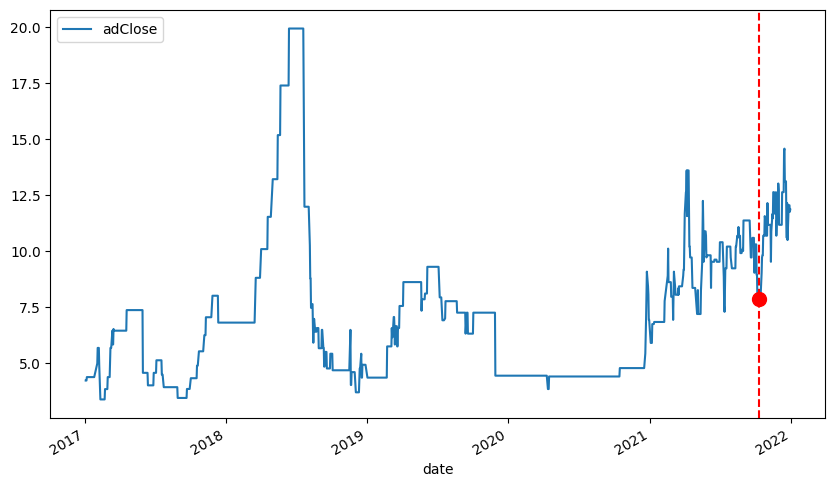

In [ ]:
# filter the data to get only the rows corresponding to the date of interest
event_date = '2021-10-11'
event_data = df_bwa[df_bwa.index == event_date]

# plot the data with a larger size
fig, ax = plt.subplots(figsize=(10, 6))
df_bwa[['adClose']].plot(ax=ax)

# add a vertical line at the date of interest
plt.axvline(x=event_date, color='r', linestyle='--')

# add a marker for the event
ax.scatter(x=event_data.index, y=event_data['adClose'], color='r', s=100, zorder=3)

# show the plot
plt.show()

In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_bwa = df_bwa.iloc[-test_size:]

# define the training set as the rest of the data
df_train_bwa = df_bwa.iloc[:-test_size]

In [ ]:
# # tính indicators cho train va test
# df_train_bwa = func_compute_technical_indicators(df_train_bwa)
# df_test_bwa = func_compute_technical_indicators(df_test_bwa)


In [ ]:
df_bwa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1252 entries, 2017-01-03 to 2021-12-31
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   basicPrice        1252 non-null   float64
 1   ceilingPrice      1252 non-null   float64
 2   floorPrice        1252 non-null   float64
 3   open              1252 non-null   float64
 4   high              1252 non-null   float64
 5   low               1252 non-null   float64
 6   close             1252 non-null   float64
 7   average           1252 non-null   float64
 8   adOpen            1252 non-null   float64
 9   adHigh            1252 non-null   float64
 10  adLow             1252 non-null   float64
 11  adClose           1252 non-null   float64
 12  adAverage         1252 non-null   float64
 13  nmVolume          1252 non-null   float64
 14  nmValue           1252 non-null   float64
 15  close_diff_1      1252 non-null   float64
 16  adAverage_diff_1  1252 n

In [ ]:
df_train_bwa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1192 entries, 2017-01-03 to 2021-10-08
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   basicPrice        1192 non-null   float64
 1   ceilingPrice      1192 non-null   float64
 2   floorPrice        1192 non-null   float64
 3   open              1192 non-null   float64
 4   high              1192 non-null   float64
 5   low               1192 non-null   float64
 6   close             1192 non-null   float64
 7   average           1192 non-null   float64
 8   adOpen            1192 non-null   float64
 9   adHigh            1192 non-null   float64
 10  adLow             1192 non-null   float64
 11  adClose           1192 non-null   float64
 12  adAverage         1192 non-null   float64
 13  nmVolume          1192 non-null   float64
 14  nmValue           1192 non-null   float64
 15  close_diff_1      1192 non-null   float64
 16  adAverage_diff_1  1192 n

### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1107
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 6.933906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

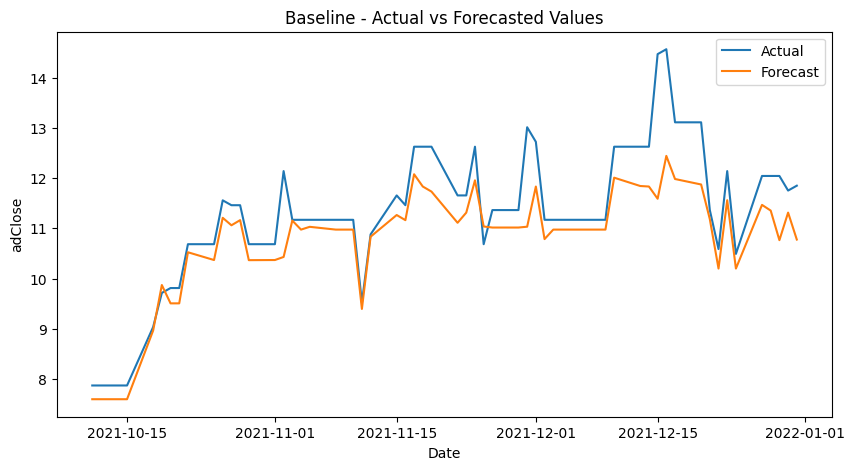

MAE: 0.533690096411438
MSE: 0.5722196815469363
MAPE: 4.448063679605152
RMSE: 0.7564520351925403
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.992135    0.14765   0.085232    0.291945    1.704695  0.727955   0.53369   

   Test_MSE  Test_RMSE  Test_MAPE  
0   0.57222   0.756452   4.448064  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_bwa, df_test_bwa, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_bwa, param_distributions))

<ipython-input-11-95c8ce723799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_pct_1'] = data['adClose'].pct_change()
<ipython-input-11-95c8ce723799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_diff_1'] = data['adClose'].diff()
<ipython-input-11-95c8ce723799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 894
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 6.933906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

<ipython-input-15-55a2abf4c40c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['forecast'] = model.predict(train_data[features])
<ipython-input-15-55a2abf4c40c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecast'] = model.predict(test_data[features])
<ipython-input-15-55a2abf4c40c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_results = df_model_results.append({
<ipython-inp

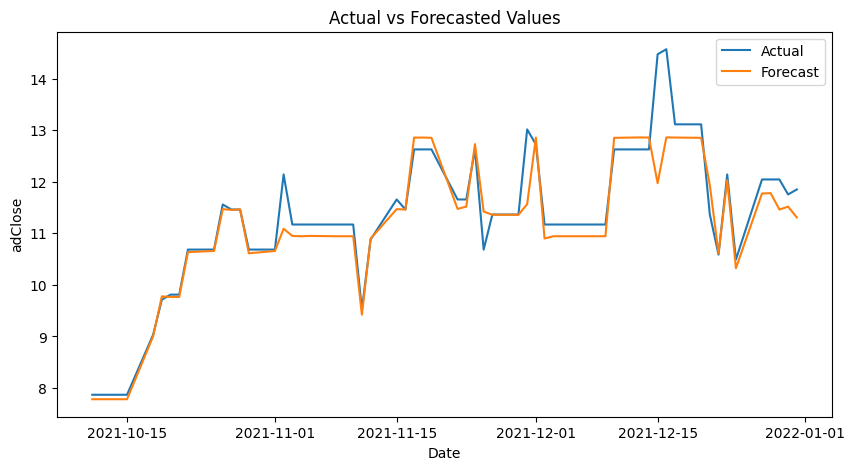

MAE: 0.2772452976684639
MSE: 0.2568952135555758
MAPE: 2.2719209744729594
RMSE: 0.5068483141488939
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.999759   0.021632    0.00261    0.051088    0.300113  0.877867  0.277245   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.256895   0.506848   2.271921  
Feature Importance:
             Feature  Importance
0         basicPrice          19
1       ceilingPrice           4
2         floorPrice           1
3               open          71
4               high           6
5                low          21
6              close          17
7            average           0
8             adOpen          33
9             adHigh         123
10             adLow          55
11         adAverage          34
12          nmVolume           6
13           nmValue           4
14      close_diff_1           9
15  adAverage_diff_1           0
16   adAverage_pct_1          11


In [ ]:
best_params = {'num_leaves': 7, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.2,
               'min_gain_to_split': 0.01, 'max_depth': 4, 'path_smooth': 0.3}
func_lgb_model_train_test(df_train_bwa, df_test_bwa, best_params)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[

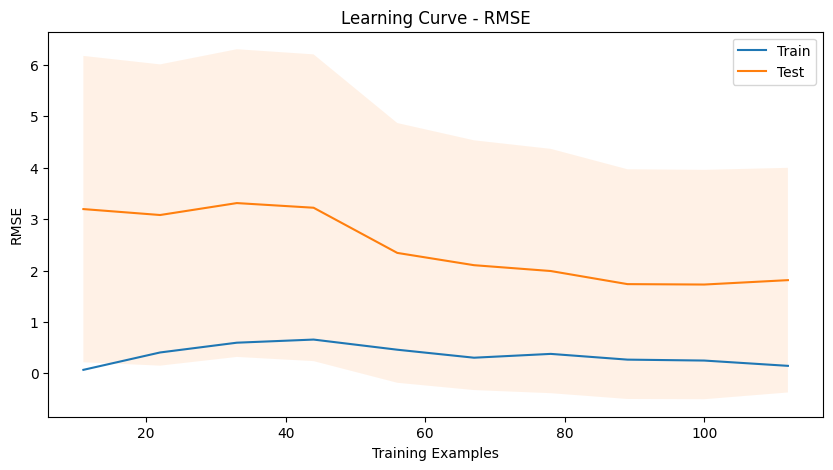

In [ ]:
best_params = {'num_leaves': 7, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.2,
               'min_gain_to_split': 0.01, 'max_depth': 4, 'path_smooth': 0.3}
func_lgb_model_train_test_learning_curve(df_train_bwa, best_params)

## **Stock DVC**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_dvc = df_upcom[df_upcom['code']=='DVC']
df_dvc

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
7,DVC,2021-12-01,15:12:01,UPCOM,12.6,14.4,10.8,12.8,12.8,12.8,...,12.333,12.333,12.333,200.0,2560000.0,0.0,0.0,0.2,0.1927,1.5873
20,DVC,2021-12-07,15:12:01,UPCOM,13.2,15.1,11.3,11.8,11.8,11.8,...,11.369,11.369,11.369,1000.0,11800000.0,0.0,0.0,-1.4,-1.3489,-10.6061
83,DVC,2021-12-08,15:12:01,UPCOM,11.8,13.5,10.1,12.1,13.5,12.1,...,11.658,13.007,12.757,4300.0,56930000.0,0.0,0.0,1.7,1.6379,14.4068
132,DVC,2021-12-28,15:12:01,UPCOM,13.6,15.6,11.6,13.6,13.6,13.6,...,13.600,13.600,13.600,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
261,DVC,2021-11-08,15:11:01,UPCOM,12.8,14.7,10.9,12.0,14.3,12.0,...,11.562,11.947,13.510,37500.0,525830000.0,0.0,0.0,-0.4,-0.3854,-3.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52796,DVC,2017-12-21,15:12:01,UPCOM,10.3,14.4,6.2,10.3,10.3,10.3,...,7.915,7.915,7.915,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52833,DVC,2017-12-04,15:12:01,UPCOM,11.0,15.4,6.6,11.0,11.0,11.0,...,7.915,7.915,7.915,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52875,DVC,2017-12-29,15:12:01,UPCOM,10.3,14.4,6.2,10.3,10.3,10.3,...,7.915,7.915,7.915,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
52876,DVC,2017-08-07,15:08:01,UPCOM,6.0,6.9,5.1,6.0,6.0,6.0,...,4.317,4.317,4.317,0.0,0.0,1201.0,7206000.0,0.0,0.0000,0.0000


In [ ]:
# columns info
df_dvc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 7 to 52905
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float64

In [ ]:
# df_dvc unique values count
df_dvc.nunique()

code               1
date            1252
time              34
floor              1
basicPrice        84
ceilingPrice      85
floorPrice        80
open              86
high              85
low               83
close             87
average          185
adOpen           156
adHigh           159
adLow            148
adClose          156
adAverage        231
nmVolume         111
nmValue          274
ptVolume           9
ptValue            9
change            44
adChange         137
pctChange        202
dtype: int64

In [ ]:
# drop unnecessary columns
# df_dvc = df_dvc.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)
df_dvc = df_dvc.drop(columns=['code', 'floor', 'time'], axis=1)

In [ ]:
# find duplication
df_dvc.duplicated().sum()

0

In [ ]:
# find missing values
df_dvc.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
ptVolume        0
ptValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_dvc.set_index('date', inplace=True)
df_dvc.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_dvc = df_dvc.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_dvc

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,10.8,15.1,6.5,8.3,8.3,8.3,8.3,8.300,5.973,5.973,5.973,5.973,5.973,100.0,830000.0,0.0,0.0,-2.5,-1.7991,-23.1481
2017-01-04,8.3,9.5,7.1,8.3,8.3,8.3,8.3,8.300,5.973,5.973,5.973,5.973,5.973,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2017-01-05,8.3,9.5,7.1,8.3,8.3,8.3,8.3,8.300,5.973,5.973,5.973,5.973,5.973,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2017-01-06,8.3,9.5,7.1,8.3,8.3,8.3,8.3,8.300,5.973,5.973,5.973,5.973,5.973,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2017-01-09,8.3,9.5,7.1,8.3,8.3,8.3,8.3,8.300,5.973,5.973,5.973,5.973,5.973,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,13.6,15.6,11.6,13.6,13.6,13.6,13.6,13.600,13.600,13.600,13.600,13.600,13.600,800.0,10880000.0,0.0,0.0,0.0,0.0000,0.0000
2021-12-28,13.6,15.6,11.6,13.6,13.6,13.6,13.6,13.600,13.600,13.600,13.600,13.600,13.600,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-12-29,13.6,15.6,11.6,13.6,13.6,13.6,13.6,13.600,13.600,13.600,13.600,13.600,13.600,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000


In [ ]:
df_dvc.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2021-10-11,11.3,12.9,9.7,12.9,12.9,11.0,11.1,11.962,12.429,12.429,10.599,10.695,11.525,7716.0,92316400.0,0.0,0.0,-0.2,-0.1927,-1.7699
2021-10-12,12.0,13.8,10.2,11.5,12.0,11.5,12.0,11.583,11.080,11.562,11.080,11.562,11.160,1200.0,13900000.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-13,11.6,13.3,9.9,11.3,12.0,11.3,12.0,11.875,10.888,11.562,10.888,11.562,11.442,7700.0,91440000.0,0.0,0.0,0.4,0.3854,3.4483
2021-10-14,11.9,13.6,10.2,12.0,12.8,12.0,12.8,12.347,11.562,12.333,11.562,12.333,11.896,7000.0,86430000.0,0.0,0.0,0.9,0.8672,7.5630
2021-10-15,12.3,14.1,10.5,12.6,12.6,11.2,11.2,12.472,12.140,12.140,10.791,10.791,12.017,5700.0,71090000.0,0.0,0.0,-1.1,-1.0598,-8.9431
2021-10-18,12.5,14.3,10.7,13.0,13.6,11.4,12.0,12.476,12.526,13.104,10.984,11.562,12.021,10300.0,128500000.0,0.0,0.0,-0.5,-0.4818,-4.0000
2021-10-19,12.5,14.3,10.7,12.5,12.5,12.5,12.5,12.500,12.044,12.044,12.044,12.044,12.044,3500.0,43750000.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-20,12.5,14.3,10.7,12.5,12.5,12.5,12.5,12.500,12.044,12.044,12.044,12.044,12.044,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-21,12.5,14.3,10.7,12.5,12.5,12.5,12.5,12.500,12.044,12.044,12.044,12.044,12.044,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000


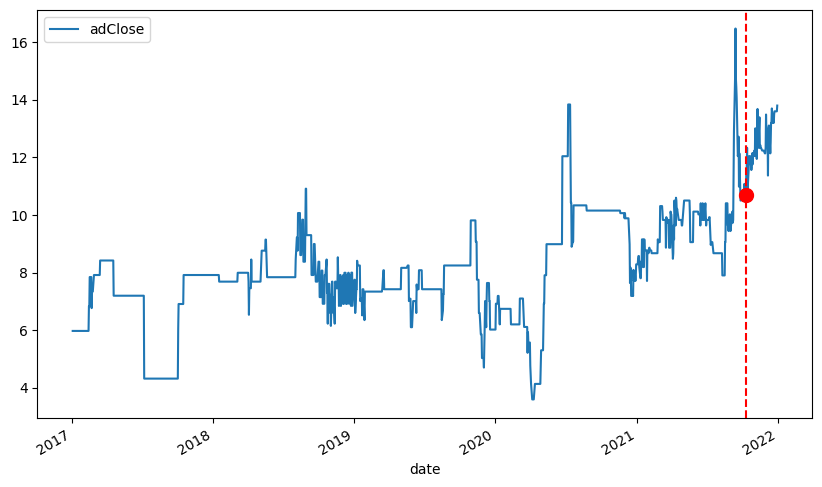

In [ ]:
# filter the data to get only the rows corresponding to the date of interest
event_date = '2021-10-11'
event_data = df_dvc[df_dvc.index == event_date]

# plot the data with a larger size
fig, ax = plt.subplots(figsize=(10, 6))
df_dvc[['adClose']].plot(ax=ax)

# add a vertical line at the date of interest
plt.axvline(x=event_date, color='r', linestyle='--')

# add a marker for the event
ax.scatter(x=event_data.index, y=event_data['adClose'], color='r', s=100, zorder=3)

# show the plot
plt.show()

In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_dvc = df_dvc.iloc[-test_size:]

# define the training set as the rest of the data
df_train_dvc = df_dvc.iloc[:-test_size]

In [ ]:
# # tính indicators cho train va test
# df_train_bwa = func_compute_technical_indicators(df_train_bwa)
# df_test_bwa = func_compute_technical_indicators(df_test_bwa)


### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1168
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 8.020867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

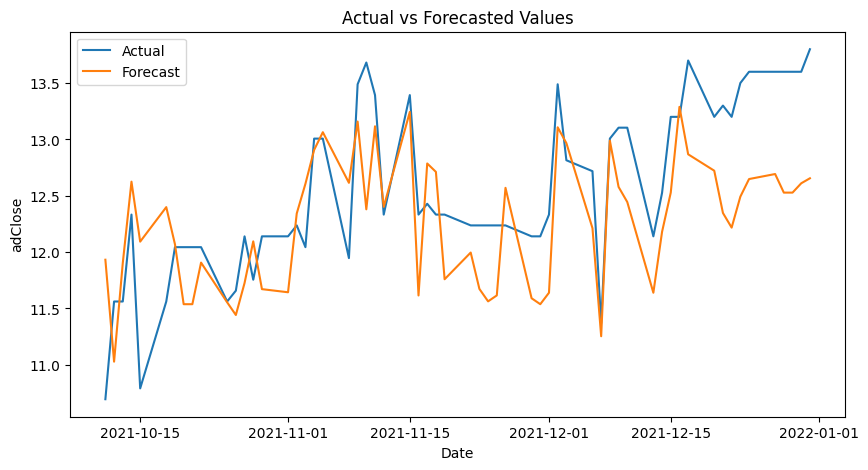

MAE: 0.5323536790218811
MSE: 0.4022243373361855
MAPE: 4.2296507714541205
RMSE: 0.6342115871979835
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.986072   0.103217   0.041225    0.203039    1.336577  0.293452  0.532354   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.402224   0.634212   4.229651  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_dvc, df_test_dvc, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_dvc, param_distributions))

<ipython-input-11-95c8ce723799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_pct_1'] = data['adClose'].pct_change()
<ipython-input-11-95c8ce723799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_diff_1'] = data['adClose'].diff()
<ipython-input-11-95c8ce723799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 995
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 8.020867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

<ipython-input-15-55a2abf4c40c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['forecast'] = model.predict(train_data[features])
<ipython-input-15-55a2abf4c40c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecast'] = model.predict(test_data[features])
<ipython-input-15-55a2abf4c40c>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_results = df_model_results.append({
<ipython-inp

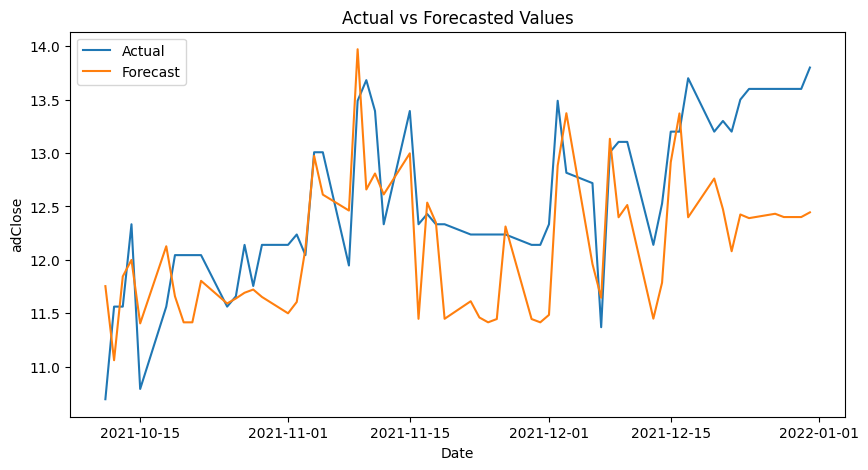

MAE: 0.602627901054039
MSE: 0.4948852329435432
MAPE: 4.74706995220988
RMSE: 0.703480797849908
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.994416    0.04382   0.016528    0.128559    0.532442  0.130684  0.602628   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.494885   0.703481    4.74707  
Feature Importance:
             Feature  Importance
0         basicPrice          30
1       ceilingPrice          64
2         floorPrice          29
3               open          22
4               high          25
5                low          16
6              close          48
7            average           3
8             adOpen          42
9             adHigh          94
10             adLow          96
11         adAverage          71
12          nmVolume          43
13           nmValue          54
14          ptVolume           0
15           ptValue           0
16      close_diff_1          36
17  adAverage_diff_1          25
18   adAverage_pct_1    

In [ ]:
best_params = {'num_leaves': 10, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.1,
               'min_gain_to_split': 0.01, 'max_depth': 5, 'path_smooth': 0.3}
func_lgb_model_train_test(df_train_dvc, df_test_dvc, best_params)

## **Stock HFC**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_hfc = df_upcom[df_upcom['code']=='HFC']
df_hfc

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
9,HFC,2021-12-01,15:12:01,UPCOM,12.8,14.7,10.9,13.9,13.9,13.8,...,13.800,13.800,13.833,300.0,4150000.0,0.0,0.0,1.0,1.0,7.8125
51,HFC,2021-12-09,15:12:01,UPCOM,12.9,14.8,11.0,12.9,12.9,12.9,...,12.900,12.900,12.900,10.0,110000.0,0.0,0.0,0.0,0.0,0.0000
85,HFC,2021-12-08,15:12:01,UPCOM,13.5,15.5,11.5,11.8,13.3,11.8,...,11.800,13.000,12.900,600.0,7740000.0,0.0,0.0,-0.5,-0.5,-3.7037
134,HFC,2021-12-28,15:12:01,UPCOM,13.4,15.4,11.4,13.4,13.4,13.4,...,13.400,13.400,13.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
152,HFC,2021-12-20,15:12:01,UPCOM,12.5,14.3,10.7,13.4,13.4,13.4,...,13.400,13.400,13.400,100.0,1340000.0,0.0,0.0,0.9,0.9,7.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52926,HFC,2017-10-30,15:10:01,UPCOM,10.0,11.5,8.5,10.0,10.0,10.0,...,9.436,9.436,9.436,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
52927,HFC,2017-11-08,15:11:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,9.436,9.436,9.436,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
52928,HFC,2017-11-22,15:11:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,9.436,9.436,9.436,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
52929,HFC,2017-12-20,15:12:01,UPCOM,16.1,18.5,13.7,16.1,16.1,16.1,...,15.192,15.192,15.192,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [ ]:
# columns info
df_hfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 9 to 52930
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float64

In [ ]:
# unique values count
df_hfc.nunique()

code               1
date            1252
time              34
floor              1
basicPrice       123
ceilingPrice     129
floorPrice       120
open             120
high             121
low              124
close            122
average          159
adOpen           139
adHigh           138
adLow            144
adClose          140
adAverage        172
nmVolume          80
nmValue          239
ptVolume          10
ptValue           11
change            78
adChange         111
pctChange        181
dtype: int64

In [ ]:
# drop unnecessary columns
# df_hfc = df_hfc.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)
df_hfc = df_hfc.drop(columns=['code', 'floor', 'time'], axis=1)

In [ ]:
# find duplication
df_hfc.duplicated().sum()

0

In [ ]:
# find missing values
df_hfc.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
ptVolume        0
ptValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_hfc.set_index('date', inplace=True)
df_hfc.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_hfc = df_hfc.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_hfc

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,13.1,15.0,11.2,13.1,13.1,13.1,13.1,13.1,6.447,6.447,6.447,6.447,6.447,0.0,0.0,51000.0,571200000.0,0.0,0.0,0.0
2017-01-04,13.1,15.0,11.2,13.1,13.1,13.1,13.1,13.1,6.447,6.447,6.447,6.447,6.447,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,13.1,15.0,11.2,13.1,13.1,13.1,13.1,13.1,6.447,6.447,6.447,6.447,6.447,0.0,0.0,32200.0,360640000.0,0.0,0.0,0.0
2017-01-06,13.1,15.0,11.2,13.1,13.1,13.1,13.1,13.1,6.447,6.447,6.447,6.447,6.447,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,13.1,15.0,11.2,13.1,13.1,13.1,13.1,13.1,6.447,6.447,6.447,6.447,6.447,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,13.4,15.4,11.4,13.4,13.4,13.4,13.4,13.4,13.400,13.400,13.400,13.400,13.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-28,13.4,15.4,11.4,13.4,13.4,13.4,13.4,13.4,13.400,13.400,13.400,13.400,13.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-29,13.4,15.4,11.4,13.4,13.4,13.4,13.4,13.4,13.400,13.400,13.400,13.400,13.400,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_hfc.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2021-10-11,12.0,13.8,10.2,10.2,10.2,10.2,10.2,10.200,10.2,10.2,10.2,10.2,10.200,100.0,1020000.0,0.0,0.0,-1.8,-1.8,-15.0000
2021-10-12,10.2,11.7,8.7,11.7,11.7,11.6,11.7,11.694,11.7,11.7,11.6,11.7,11.694,1653.0,19330100.0,0.0,0.0,1.5,1.5,14.7059
2021-10-13,11.7,13.4,10.0,10.3,10.3,10.3,10.3,10.300,10.3,10.3,10.3,10.3,10.300,100.0,1030000.0,0.0,0.0,-1.4,-1.4,-11.9658
2021-10-14,10.3,11.8,8.8,10.3,10.3,10.3,10.3,10.300,10.3,10.3,10.3,10.3,10.300,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2021-10-15,10.3,11.8,8.8,11.8,11.8,11.8,11.8,11.800,11.8,11.8,11.8,11.8,11.800,1200.0,14160000.0,0.0,0.0,1.5,1.5,14.5631
2021-10-18,11.8,13.5,10.1,12.5,12.5,10.8,10.8,11.650,12.5,12.5,10.8,10.8,11.650,200.0,2330000.0,0.0,0.0,-1.0,-1.0,-8.4746
2021-10-19,11.7,13.4,10.0,12.4,12.4,12.4,12.4,12.400,12.4,12.4,12.4,12.4,12.400,100.0,1240000.0,0.0,0.0,0.7,0.7,5.9829
2021-10-20,12.4,14.2,10.6,12.4,12.4,12.4,12.4,12.400,12.4,12.4,12.4,12.4,12.400,18.0,190800.0,0.0,0.0,0.0,0.0,0.0000
2021-10-21,12.4,14.2,10.6,10.9,10.9,10.9,10.9,10.900,10.9,10.9,10.9,10.9,10.900,100.0,1090000.0,0.0,0.0,-1.5,-1.5,-12.0968


In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_hfc = df_hfc.iloc[-test_size:]

# define the training set as the rest of the data
df_train_hfc = df_hfc.iloc[:-test_size]

In [ ]:
# # tính indicators cho train va test
# df_train_bwa = func_compute_technical_indicators(df_train_bwa)
# df_test_bwa = func_compute_technical_indicators(df_test_bwa)


### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 19
[LightGBM] [Info] Start training from score 15.134836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

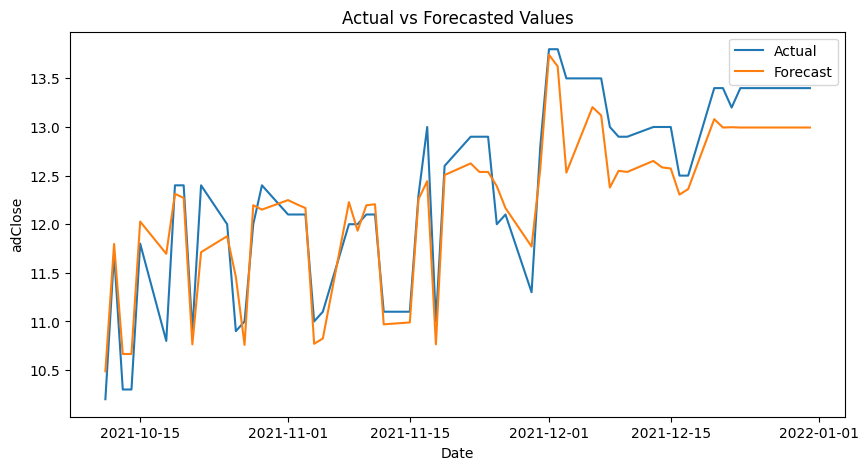

MAE: 0.296596401085009
MSE: 0.12453106155673614
MAPE: 2.4023968603213715
RMSE: 0.35288958833711165
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.996759   0.216626   0.273215      0.5227    1.571718  0.865054  0.296596   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.124531    0.35289   2.402397  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_hfc, df_test_hfc, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_hfc, param_distributions))

<ipython-input-11-95c8ce723799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_pct_1'] = data['adClose'].pct_change()
<ipython-input-11-95c8ce723799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_diff_1'] = data['adClose'].diff()
<ipython-input-11-95c8ce723799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1290
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 15.134836


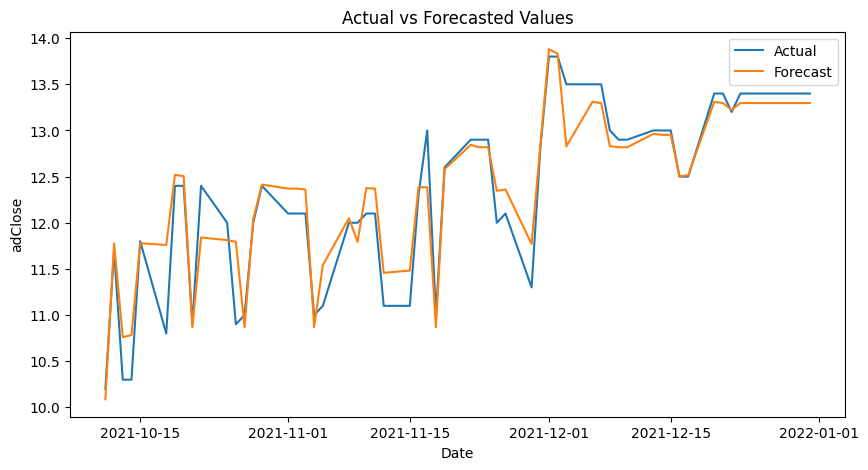

MAE: 0.19811377914218742
MSE: 0.08298498027817566
MAPE: 1.674002664714587
RMSE: 0.28807113753060315
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.998737   0.080849   0.106512    0.326361    0.453114  0.910075  0.198114   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.082985   0.288071   1.674003  
Feature Importance:
             Feature  Importance
0         basicPrice          59
1       ceilingPrice          35
2         floorPrice          50
3               open          21
4               high           3
5                low          27
6              close          18
7            average           1
8             adOpen          28
9             adHigh          20
10             adLow          20
11         adAverage          40
12          nmVolume           0
13           nmValue           3
14          ptVolume           0
15           ptValue           0
16      close_diff_1          44
17  adAverage_diff_1           7
18   adAverage_pct

In [ ]:
best_params = {'num_leaves': 5, 'max_bin': 255, 'lambda_l1': 0.2, 'lambda_l2': 0.15,
               'min_gain_to_split': 0.05, 'max_depth': 4, 'path_smooth': 0.2}
func_lgb_model_train_test(df_train_hfc, df_test_hfc, best_params)

[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=

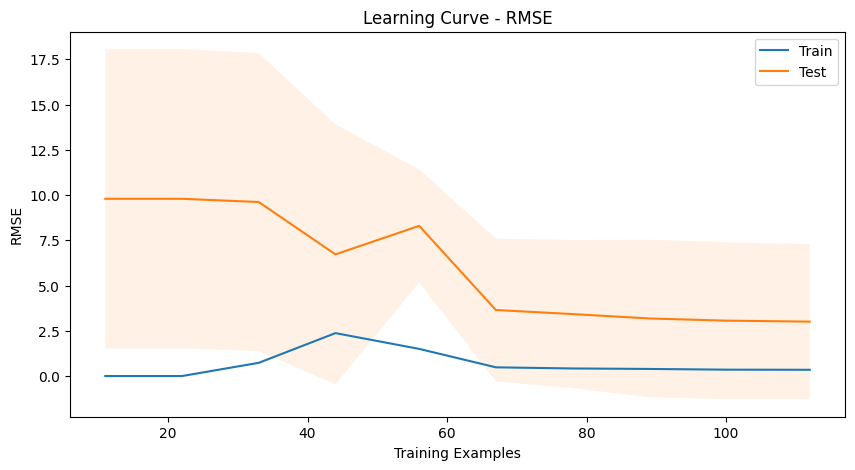

In [ ]:
func_lgb_model_train_test_learning_curve(df_train_hfc, best_params)

## **Stock HTW**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_htw = df_upcom[df_upcom['code']=='HTW']
df_htw

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
10,HTW,2021-12-01,15:12:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,HTW,2021-12-09,15:12:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,HTW,2021-12-06,15:12:02,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,HTW,2021-11-16,15:11:02,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,HTW,2021-11-19,15:11:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52773,HTW,2017-11-17,15:11:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52775,HTW,2017-12-15,15:12:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52779,HTW,2017-12-28,15:12:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52781,HTW,2017-12-14,15:12:01,UPCOM,10.0,14.0,6.0,10.0,10.0,10.0,...,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# columns info
df_htw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 10 to 52806
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float6

In [ ]:
# unique values count
df_htw.nunique()

code               1
date            1252
time              34
floor              1
basicPrice         2
ceilingPrice       2
floorPrice         2
open               1
high               1
low                1
close              1
average            1
adOpen             1
adHigh             1
adLow              1
adClose            1
adAverage          1
nmVolume           1
nmValue            1
ptVolume           1
ptValue            1
change             1
adChange           1
pctChange          1
dtype: int64

In [ ]:
# drop unnecessary columns
df_htw = df_htw.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)

In [ ]:
# find duplication
df_htw.duplicated().sum()

0

In [ ]:
# find missing values
df_htw.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_htw.set_index('date', inplace=True)
df_htw.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_htw = df_htw.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_htw

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2017-01-03,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-01-05,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-01-06,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-01-09,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-12-28,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-12-29,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_htw.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2021-10-11,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-12,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-13,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-14,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-15,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-18,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-19,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-20,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0
2021-10-21,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_htw = df_htw.iloc[-test_size:]

# define the training set as the rest of the data
df_train_htw = df_htw.iloc[:-test_size]

In [ ]:
# # tính indicators cho train va test
# df_train_bwa = func_compute_technical_indicators(df_train_bwa)
# df_test_bwa = func_compute_technical_indicators(df_test_bwa)


In [ ]:
df_test_htw

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,...,VWAP,ADL,Upper_Band,Middle_Band,Lower_Band,MACD,%K,%D,MoM,forecast
date,,,,,,,,,,,,,,,,,,,,,
2021-10-11,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-12,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-13,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-14,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-15,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-18,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-19,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-20,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
2021-10-21,10.0,14.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 0
[LightGBM] [Info] Start training from score 10.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[Ligh

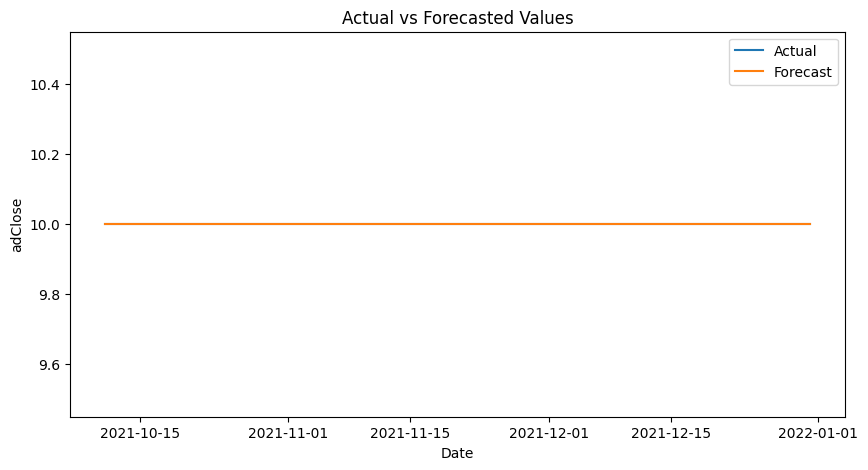

MAE: 0.0
MSE: 0.0
MAPE: 0.0
RMSE: 0.0
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE  Test_R2  Test_MAE  \
0       1.0        0.0        0.0         0.0         0.0      1.0       0.0   

   Test_MSE  Test_RMSE  Test_MAPE  
0       0.0        0.0        0.0  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_htw, df_test_htw, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_htw, param_distributions))

2023-05-01 04:22:45,164	WARNING tune.py:184 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 


KeyboardInterrupt: ignored

In [ ]:
# best_params = {'num_leaves': 5, 'max_bin': 255, 'lambda_l1': 0.2, 'lambda_l2': 0.15,
#                'min_gain_to_split': 0.05, 'max_depth': 4, 'path_smooth': 0.2}
# func_lgb_model_train_test(df_train_hfc, df_test_hfc, best_params)

## **Stock LAW**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_law = df_upcom[df_upcom['code']=='LAW']
df_law

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
18,LAW,2021-12-01,15:12:01,UPCOM,9.1,12.7,5.5,9.1,9.1,9.1,...,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,LAW,2021-12-10,15:12:01,UPCOM,9.1,12.7,5.5,9.1,9.1,9.1,...,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,LAW,2021-12-29,15:12:01,UPCOM,9.1,12.7,5.5,9.1,9.1,9.1,...,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,LAW,2021-12-08,15:12:01,UPCOM,9.1,12.7,5.5,9.1,9.1,9.1,...,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,LAW,2021-12-22,15:12:01,UPCOM,9.1,12.7,5.5,9.1,9.1,9.1,...,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52828,LAW,2017-12-13,15:12:01,UPCOM,13.4,18.7,8.1,13.4,13.4,13.4,...,10.270,10.270,10.270,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52831,LAW,2017-12-29,15:12:01,UPCOM,13.4,18.7,8.1,13.4,13.4,13.4,...,10.270,10.270,10.270,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52906,LAW,2017-02-03,15:02:01,UPCOM,14.0,19.6,8.4,14.0,14.0,14.0,...,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52908,LAW,2017-03-07,15:03:01,UPCOM,14.0,19.6,8.4,14.0,14.0,14.0,...,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# columns info
df_law.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 18 to 52909
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float6

In [ ]:
# unique values count
df_law.nunique()

code               1
date            1252
time              34
floor              1
basicPrice        21
ceilingPrice      27
floorPrice        27
open              20
high              22
low               21
close             23
average           22
adOpen            17
adHigh            19
adLow             19
adClose           21
adAverage         19
nmVolume          16
nmValue           30
ptVolume           6
ptValue            6
change            18
adChange          19
pctChange         19
dtype: int64

In [ ]:
# drop unnecessary columns
df_law = df_law.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)

In [ ]:
# find duplication
df_law.duplicated().sum()

0

In [ ]:
# find missing values
df_law.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_law.set_index('date', inplace=True)
df_law.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_law = df_law.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_law

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2017-01-03,14.0,19.6,8.4,14.0,14.0,14.0,14.0,14.0,10.346,10.346,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0
2017-01-04,14.0,19.6,8.4,14.0,14.0,14.0,14.0,14.0,10.346,10.346,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0
2017-01-05,14.0,19.6,8.4,14.0,14.0,14.0,14.0,14.0,10.346,10.346,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0
2017-01-06,14.0,19.6,8.4,14.0,14.0,14.0,14.0,14.0,10.346,10.346,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0
2017-01-09,14.0,19.6,8.4,14.0,14.0,14.0,14.0,14.0,10.346,10.346,10.346,10.346,10.346,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.1,12.7,5.5,9.1,9.1,9.1,9.1,9.1,9.100,9.100,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0
2021-12-28,9.1,12.7,5.5,9.1,9.1,9.1,9.1,9.1,9.100,9.100,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0
2021-12-29,9.1,12.7,5.5,9.1,9.1,9.1,9.1,9.1,9.100,9.100,9.100,9.100,9.100,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_law.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2021-10-11,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-12,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-13,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-14,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-15,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-18,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-19,13.2,18.4,8.0,9.2,9.2,9.0,9.0,9.1,9.2,9.2,9.0,9.0,9.1,4000.0,36400000.0,-4.2,-4.2,-31.8182
2021-10-20,9.1,10.4,7.8,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,0.0,0.0,0.0,0.0,0.0000
2021-10-21,9.1,10.4,7.8,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,0.0,0.0,0.0,0.0,0.0000


In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_law = df_law.iloc[-test_size:]

# define the training set as the rest of the data
df_train_law = df_law.iloc[:-test_size]

In [ ]:
df_test_law

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,
2021-10-11,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-12,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-13,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-14,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-15,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-18,13.2,18.4,8.0,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,13.2,0.0,0.0,0.0,0.0,0.0000
2021-10-19,13.2,18.4,8.0,9.2,9.2,9.0,9.0,9.1,9.2,9.2,9.0,9.0,9.1,4000.0,36400000.0,-4.2,-4.2,-31.8182
2021-10-20,9.1,10.4,7.8,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,0.0,0.0,0.0,0.0,0.0000
2021-10-21,9.1,10.4,7.8,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,9.1,0.0,0.0,0.0,0.0,0.0000


### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 11.316496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

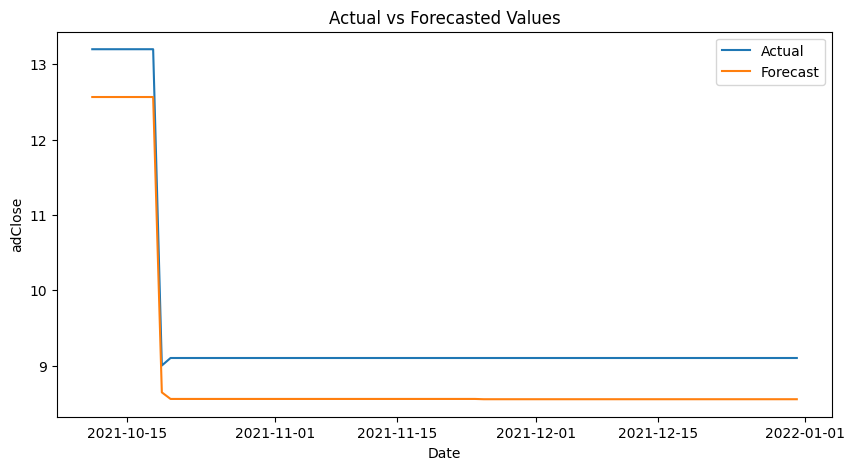

MAE: 0.551307051362788
MSE: 0.30529922082083616
MAPE: 5.842426857592311
RMSE: 0.5525388862522131
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.995731   0.043807   0.013245    0.115088    0.388126  0.798407  0.551307   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.305299   0.552539   5.842427  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_law, df_test_law, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_law, param_distributions))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 30
[LightGBM] [Info] Start training from score 11.316496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

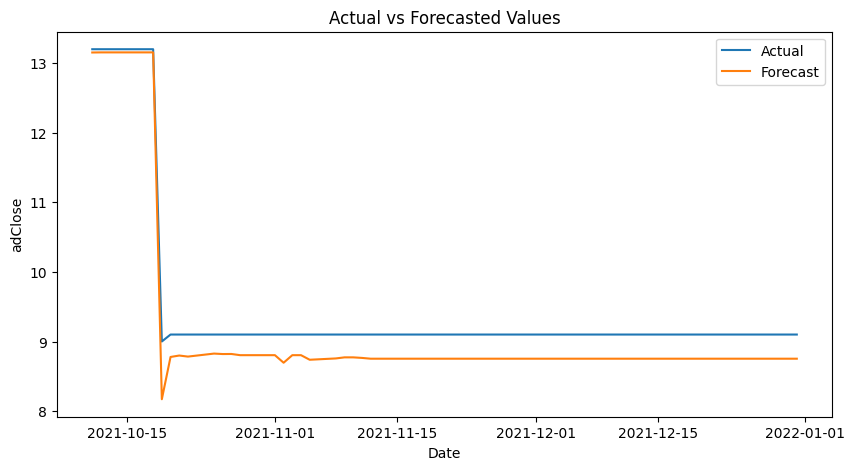

MAE: 0.3160130502163918
MSE: 0.11244739825921904
MAPE: 3.458754041727726
RMSE: 0.33533177341137693
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.998399   0.011011   0.004967    0.070476    0.095123  0.924849  0.320095   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.113811   0.337359   3.496072  


In [ ]:
best_params = {'num_leaves': 7, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.15,
               'min_gain_to_split': 0.01, 'max_depth': 6, 'path_smooth': 0.1}
func_lgb_model_train_test(df_train_law, df_test_law, best_params)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=

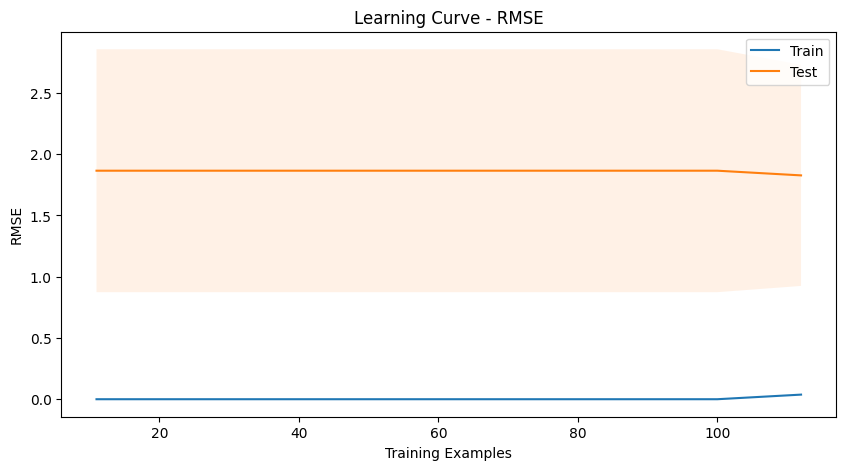

In [ ]:
best_params = {'num_leaves': 7, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.15,
               'min_gain_to_split': 0.01, 'max_depth': 6, 'path_smooth': 0.1}
func_lgb_model_train_test_learning_curve(df_train_law, best_params)

# **Backup**

## **Stock MTG**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_mtg = df_upcom[df_upcom['code']=='MTG']
df_mtg

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
22,MTG,2021-12-01,15:12:01,UPCOM,8.1,9.3,6.9,8.0,8.1,7.9,...,7.9,8.1,8.017,37600.0,3.014300e+08,0.0,0.0,0.0,0.0,0.0000
42,MTG,2021-12-03,15:12:01,UPCOM,8.3,9.5,7.1,8.3,8.4,8.1,...,8.1,8.2,8.252,18189.0,1.500820e+08,0.0,0.0,-0.1,-0.1,-1.2048
141,MTG,2021-12-02,15:12:01,UPCOM,8.0,9.2,6.8,8.6,8.6,8.1,...,8.1,8.3,8.325,8100.0,6.743000e+07,0.0,0.0,0.3,0.3,3.7500
221,MTG,2021-11-23,15:11:01,UPCOM,8.7,10.0,7.4,8.5,8.7,8.0,...,8.0,8.7,8.449,33200.0,2.805100e+08,0.0,0.0,0.0,0.0,0.0000
223,MTG,2021-11-10,15:11:01,UPCOM,8.3,9.5,7.1,8.4,9.5,8.3,...,8.3,9.5,9.062,189351.0,1.715878e+09,0.0,0.0,1.2,1.2,14.4578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52731,MTG,2017-12-19,15:12:01,UPCOM,3.5,4.0,3.0,3.7,3.7,3.7,...,3.7,3.7,3.700,1000.0,3.700000e+06,0.0,0.0,0.2,0.2,5.7143
52817,MTG,2017-10-26,15:10:01,UPCOM,4.2,4.8,3.6,4.2,4.2,4.2,...,4.2,4.2,4.200,10.0,3.600000e+04,0.0,0.0,0.0,0.0,0.0000
52820,MTG,2017-12-14,15:12:01,UPCOM,3.9,4.4,3.4,3.9,3.9,3.9,...,3.9,3.9,3.900,100.0,3.900000e+05,0.0,0.0,0.0,0.0,0.0000
52854,MTG,2017-11-13,15:11:01,UPCOM,4.2,4.8,3.6,3.8,3.8,3.8,...,3.8,3.8,3.800,3500.0,1.330000e+07,0.0,0.0,-0.4,-0.4,-9.5238


In [ ]:
# columns info
df_mtg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 22 to 52872
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float6

In [ ]:
# unique values count
df_mtg.nunique()

code               1
date            1252
time              34
floor              1
basicPrice        78
ceilingPrice      78
floorPrice        70
open              76
high              79
low               73
close             74
average          335
adOpen            76
adHigh            79
adLow             73
adClose           74
adAverage        335
nmVolume         346
nmValue          564
ptVolume          24
ptValue           24
change            27
adChange          27
pctChange        206
dtype: int64

In [ ]:
# drop unnecessary columns
# df_mtg = df_mtg.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)
df_mtg = df_mtg.drop(columns=['code', 'floor', 'time'], axis=1)

In [ ]:
# find duplication
df_mtg.duplicated().sum()

0

In [ ]:
# find missing values
df_mtg.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
ptVolume        0
ptValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_mtg.set_index('date', inplace=True)
df_mtg.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_mtg = df_mtg.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_mtg

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2017-01-03,3.7,4.2,3.2,3.2,3.4,3.2,3.2,3.273,3.2,3.4,3.2,3.2,3.273,67800.0,221900000.0,0.0,0.0,-0.5,-0.5,-13.5135
2017-01-04,3.3,3.7,2.9,3.3,3.3,2.9,3.1,3.065,3.3,3.3,2.9,3.1,3.065,23910.0,73292000.0,0.0,0.0,-0.2,-0.2,-6.0606
2017-01-05,3.1,3.5,2.7,3.1,3.2,3.1,3.2,3.110,3.1,3.2,3.1,3.2,3.110,76100.0,236700000.0,0.0,0.0,0.1,0.1,3.2258
2017-01-06,3.1,3.5,2.7,3.1,3.2,2.7,3.0,2.803,3.1,3.2,2.7,3.0,2.803,47400.0,132850000.0,0.0,0.0,-0.1,-0.1,-3.2258
2017-01-09,2.8,3.2,2.4,2.6,3.0,2.6,3.0,2.829,2.6,3.0,2.6,3.0,2.829,2100.0,5940000.0,0.0,0.0,0.2,0.2,7.1429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,7.5,8.6,6.4,7.5,7.8,7.5,7.8,7.685,7.5,7.8,7.5,7.8,7.685,7930.0,60938000.0,0.0,0.0,0.3,0.3,4.0000
2021-12-28,7.7,8.8,6.6,7.6,7.8,7.6,7.7,7.686,7.6,7.8,7.6,7.7,7.686,38101.0,292837600.0,0.0,0.0,0.0,0.0,0.0000
2021-12-29,7.7,8.8,6.6,7.8,7.8,7.7,7.8,7.750,7.8,7.8,7.7,7.8,7.750,14711.0,114014700.0,0.0,0.0,0.1,0.1,1.2987


In [ ]:
df_mtg.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2021-10-11,9.6,11.0,8.2,10.0,10.0,8.6,9.4,9.502,10.0,10.0,8.6,9.4,9.502,37407.0,3.554372e+08,0.0,0.0,-0.2,-0.2,-2.0833
2021-10-12,9.5,10.9,8.1,9.5,10.0,8.6,9.2,8.999,9.5,10.0,8.6,9.2,8.999,50420.0,4.537280e+08,0.0,0.0,-0.3,-0.3,-3.1579
2021-10-13,9.0,10.3,7.7,9.2,9.2,8.0,8.5,8.269,9.2,9.2,8.0,8.5,8.269,74900.0,6.193800e+08,0.0,0.0,-0.5,-0.5,-5.5556
2021-10-14,8.3,9.5,7.1,9.0,9.5,9.0,9.5,9.447,9.0,9.5,9.0,9.5,9.447,23724.0,2.241280e+08,0.0,0.0,1.2,1.2,14.4578
2021-10-15,9.4,10.8,8.0,10.8,10.8,9.6,10.0,10.142,10.8,10.8,9.6,10.0,10.142,89697.0,9.096868e+08,0.0,0.0,0.6,0.6,6.3830
2021-10-18,10.1,11.6,8.6,10.1,10.1,8.8,9.1,9.360,10.1,10.1,8.8,9.1,9.360,38300.0,3.584800e+08,0.0,0.0,-1.0,-1.0,-9.9010
2021-10-19,9.4,10.8,8.0,9.4,9.6,9.0,9.2,9.142,9.4,9.6,9.0,9.2,9.142,16700.0,1.526700e+08,0.0,0.0,-0.2,-0.2,-2.1277
2021-10-20,9.1,10.4,7.8,9.1,9.2,8.4,8.7,8.686,9.1,9.2,8.4,8.7,8.686,70400.0,6.115200e+08,0.0,0.0,-0.4,-0.4,-4.3956
2021-10-21,8.7,10.0,7.4,8.7,9.2,8.6,9.2,8.755,8.7,9.2,8.6,9.2,8.755,15038.0,1.316665e+08,0.0,0.0,0.5,0.5,5.7471


In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_mtg = df_mtg.iloc[-test_size:]

# define the training set as the rest of the data
df_train_mtg = df_mtg.iloc[:-test_size]

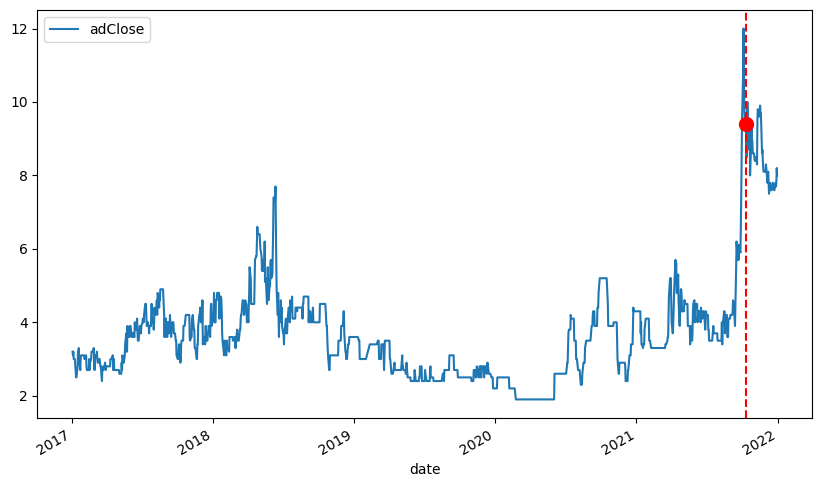

In [ ]:
import matplotlib.pyplot as plt

# filter the data to get only the rows corresponding to the date of interest
event_date = '2021-10-11'
event_data = df_mtg[df_mtg.index == event_date]

# plot the data with a larger size
fig, ax = plt.subplots(figsize=(10, 6))
df_mtg[['adClose']].plot(ax=ax)

# add a vertical line at the date of interest
plt.axvline(x=event_date, color='r', linestyle='--')

# add a marker for the event
ax.scatter(x=event_data.index, y=event_data['adClose'], color='r', s=100, zorder=3)

# show the plot
plt.show()


### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1505
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 19
[LightGBM] [Info] Start training from score 3.519379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

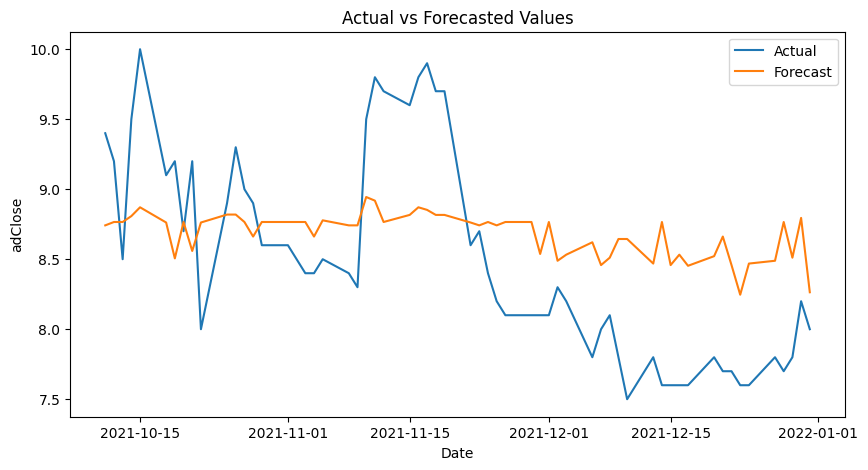

MAE: 0.5901379168948254
MSE: 0.43788580834682717
MAPE: 7.017496489302347
RMSE: 0.6617294071951368
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.973656    0.06178   0.030906      0.1758    1.523394  0.172169  0.590138   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.437886   0.661729   7.017496  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_mtg, df_test_mtg, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_mtg, param_distributions))

<ipython-input-11-95c8ce723799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_pct_1'] = data['adClose'].pct_change()
<ipython-input-11-95c8ce723799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_diff_1'] = data['adClose'].diff()
<ipython-input-11-95c8ce723799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 19
[LightGBM] [Info] Start training from score 3.519379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

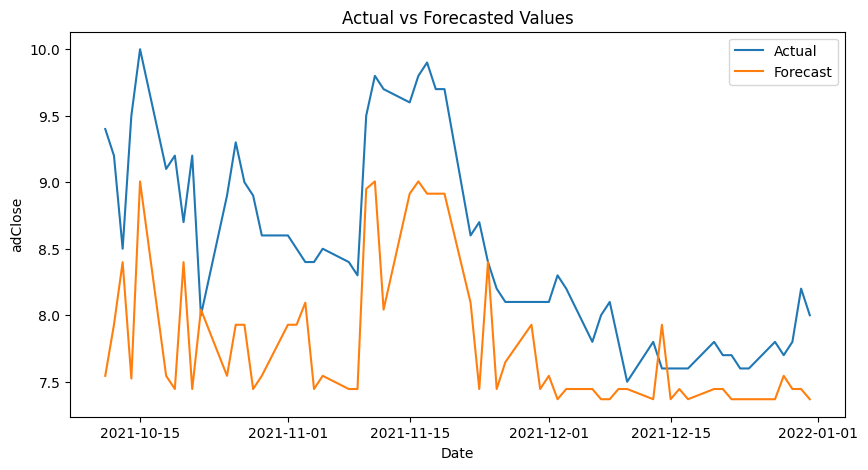

MAE: 0.7247559748678968
MSE: 0.7696051160724778
MAPE: 8.24490713107187
RMSE: 0.877271403883928
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.975419   0.029282   0.028838    0.169818    0.510044 -0.454952  0.724756   

   Test_MSE  Test_RMSE  Test_MAPE  
0  0.769605   0.877271   8.244907  
Feature Importance:
             Feature  Importance
0         basicPrice          48
1       ceilingPrice           0
2         floorPrice           0
3               open          29
4               high          28
5                low          37
6              close         251
7            average          44
8             adOpen           0
9             adHigh           0
10             adLow           0
11         adAverage           0
12          nmVolume          81
13           nmValue          42
14          ptVolume           0
15           ptValue           0
16      close_diff_1          18
17  adAverage_diff_1           0
18   adAverage_pct_1   

In [ ]:
best_params = {'num_leaves': 10, 'max_bin': 127, 'lambda_l1': 0.1, 'lambda_l2': 0.1,
               'min_gain_to_split': 0.01, 'max_depth': 6, 'path_smooth': 0.2}
func_lgb_model_train_test(df_train_mtg, df_test_mtg, best_params)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.01, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.01
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[

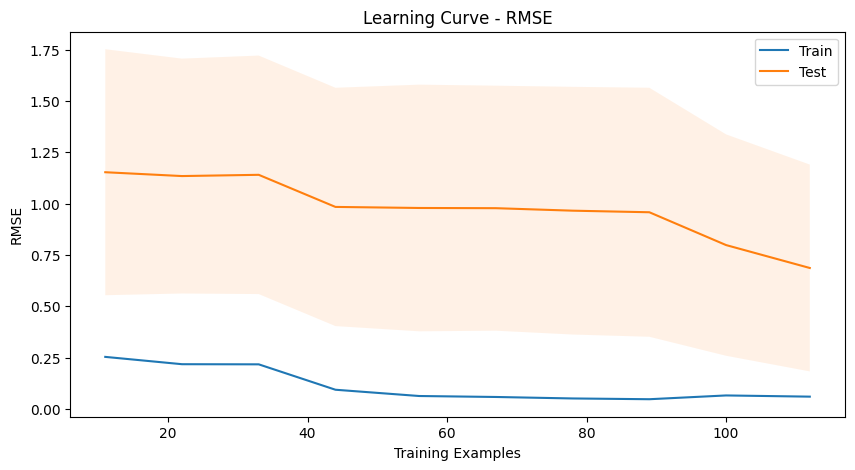

In [ ]:
best_params = {'num_leaves': 10, 'max_bin': 127, 'lambda_l1': 0.1, 'lambda_l2': 0.1,
               'min_gain_to_split': 0.01, 'max_depth': 6, 'path_smooth': 0.2}
func_lgb_model_train_test_learning_curve(df_train_mtg, best_params)

## **Stock QPH**

### **Preprocessing**

In [ ]:
# select the stock which will be used
df_qph = df_upcom[df_upcom['code']=='QPH']
df_qph

,code,date,time,floor,basicPrice,ceilingPrice,floorPrice,open,high,low,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
3,QPH,2021-12-07,15:12:01,UPCOM,32.3,37.1,27.5,32.8,33.1,32.8,...,30.828,31.110,31.000,5300.0,1.748100e+08,0.0,0.0,0.8,0.7519,2.4768
5,QPH,2021-12-01,15:12:01,UPCOM,32.0,36.8,27.2,32.4,32.5,32.4,...,30.452,30.546,30.515,600.0,1.948000e+07,0.0,0.0,0.5,0.4699,1.5625
74,QPH,2021-12-02,15:12:01,UPCOM,32.5,37.3,27.7,32.5,32.8,32.2,...,30.264,30.546,30.539,5200.0,1.689600e+08,0.0,0.0,0.0,0.0000,0.0000
75,QPH,2021-12-13,15:12:01,UPCOM,27.5,31.6,23.4,27.6,27.6,27.6,...,27.600,27.600,27.600,300.0,8.280000e+06,0.0,0.0,0.1,0.1000,0.3636
89,QPH,2021-12-16,15:12:02,UPCOM,29.0,33.3,24.7,29.0,29.0,29.0,...,29.000,29.000,29.000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52813,QPH,2017-02-08,15:02:01,UPCOM,12.0,13.8,10.2,12.0,12.0,12.0,...,7.666,7.666,7.666,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
52814,QPH,2017-04-07,15:04:01,UPCOM,15.0,17.2,12.8,17.2,17.2,17.2,...,10.986,10.986,10.986,100.0,1.720000e+06,0.0,0.0,2.2,1.4052,14.6667
52853,QPH,2017-11-08,15:11:01,UPCOM,19.9,22.8,17.0,19.9,19.9,19.9,...,12.711,12.711,12.711,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
52857,QPH,2017-12-27,15:12:01,UPCOM,20.0,23.0,17.0,20.3,20.3,20.3,...,12.967,12.967,12.967,4000.0,8.120000e+07,0.0,0.0,0.3,0.1916,1.5000


In [ ]:
# columns info
df_qph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 3 to 52891
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   code          1252 non-null   object        
 1   date          1252 non-null   datetime64[ns]
 2   time          1252 non-null   object        
 3   floor         1252 non-null   object        
 4   basicPrice    1252 non-null   float64       
 5   ceilingPrice  1252 non-null   float64       
 6   floorPrice    1252 non-null   float64       
 7   open          1252 non-null   float64       
 8   high          1252 non-null   float64       
 9   low           1252 non-null   float64       
 10  close         1252 non-null   float64       
 11  average       1252 non-null   float64       
 12  adOpen        1252 non-null   float64       
 13  adHigh        1252 non-null   float64       
 14  adLow         1252 non-null   float64       
 15  adClose       1252 non-null   float64

In [ ]:
# unique values count
df_qph.nunique()

code               1
date            1252
time              34
floor              1
basicPrice       113
ceilingPrice     116
floorPrice       105
open             113
high             116
low              113
close            117
average          186
adOpen           169
adHigh           179
adLow            166
adClose          172
adAverage        231
nmVolume         112
nmValue          295
ptVolume           4
ptValue            4
change            68
adChange         185
pctChange        209
dtype: int64

In [ ]:
# drop unnecessary columns
# df_qph = df_qph.drop(columns=['code', 'floor', 'ptVolume', 'ptValue', 'time'], axis=1)
df_qph = df_qph.drop(columns=['code', 'floor', 'time'], axis=1)

In [ ]:
# find duplication
df_qph.duplicated().sum()

0

In [ ]:
# find missing values
df_qph.isnull().sum()

date            0
basicPrice      0
ceilingPrice    0
floorPrice      0
open            0
high            0
low             0
close           0
average         0
adOpen          0
adHigh          0
adLow           0
adClose         0
adAverage       0
nmVolume        0
nmValue         0
ptVolume        0
ptValue         0
change          0
adChange        0
pctChange       0
dtype: int64

In [ ]:
df_qph.set_index('date', inplace=True)
df_qph.sort_index(inplace=True)

In [ ]:
# rebname columns so they can have the same format as the others
df_qph = df_qph.rename({'change': 'close_diff_1',
                        'adChange': 'adAverage_diff_1',
                        'pctChange': 'adAverage_pct_1'
                        }, axis=1)


In [ ]:
df_qph.tail(60)

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,close_diff_1,adAverage_diff_1,adAverage_pct_1
date,,,,,,,,,,,,,,,,,,,,
2021-10-11,27.0,31.0,23.0,27.0,27.0,27.0,27.0,27.000,25.377,25.377,25.377,25.377,25.377,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-12,27.0,31.0,23.0,27.0,27.0,27.0,27.0,27.000,25.377,25.377,25.377,25.377,25.377,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-13,27.0,31.0,23.0,27.0,27.0,27.0,27.0,27.000,25.377,25.377,25.377,25.377,25.377,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-14,27.0,31.0,23.0,30.9,30.9,30.9,30.9,30.900,29.042,29.042,29.042,29.042,29.042,100.0,3090000.0,0.0,0.0,3.9,3.6655,14.4444
2021-10-15,30.9,35.5,26.3,31.0,31.0,31.0,31.0,31.000,29.136,29.136,29.136,29.136,29.136,100.0,3100000.0,0.0,0.0,0.1,0.0940,0.3236
2021-10-18,31.0,35.6,26.4,29.0,29.0,29.0,29.0,29.000,27.256,27.256,27.256,27.256,27.256,100.0,2900000.0,0.0,0.0,-2.0,-1.8797,-6.4516
2021-10-19,29.0,33.3,24.7,31.9,31.9,27.5,27.5,27.629,29.982,29.982,25.847,25.847,25.968,3400.0,93940000.0,0.0,0.0,-1.5,-1.4098,-5.1724
2021-10-20,27.6,31.7,23.5,27.6,27.6,27.6,27.6,27.600,25.941,25.941,25.941,25.941,25.941,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2021-10-21,27.6,31.7,23.5,27.6,27.6,27.6,27.6,27.600,25.941,25.941,25.941,25.941,25.941,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000


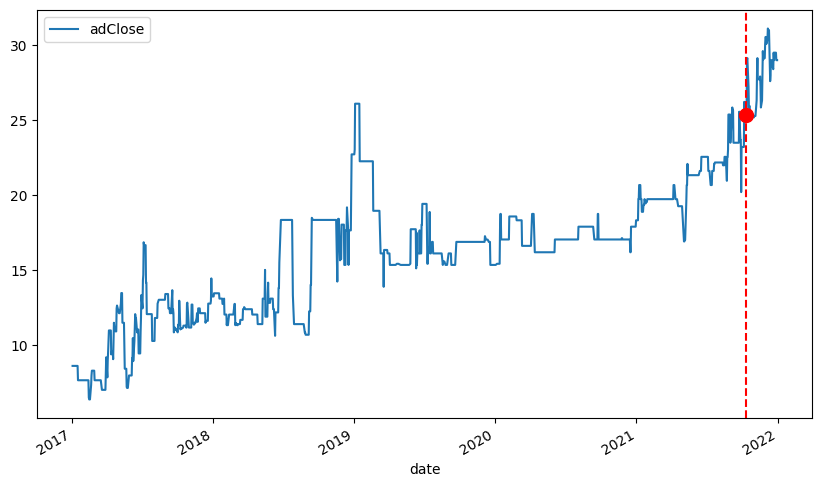

In [ ]:
# filter the data to get only the rows corresponding to the date of interest
event_date = '2021-10-11'
event_data = df_qph[df_qph.index == event_date]

# plot the data with a larger size
fig, ax = plt.subplots(figsize=(10, 6))
df_qph[['adClose']].plot(ax=ax)

# add a vertical line at the date of interest
plt.axvline(x=event_date, color='r', linestyle='--')

# add a marker for the event
ax.scatter(x=event_data.index, y=event_data['adClose'], color='r', s=100, zorder=3)

# show the plot
plt.show()

In [ ]:
# splitting train and test data. Test data is 60 days (2 months)
# define the test set as the last 60 days
test_size = 60
df_test_qph = df_qph.iloc[-test_size:]

# define the training set as the rest of the data
df_train_qph = df_qph.iloc[:-test_size]

### **LightGBM Model**

#### **Baseline Model**

In [ ]:
import warnings

# suppress all warning messages
warnings.filterwarnings("ignore")

In [ ]:
# # performing baseline model on 10-fold cross validation set
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0.5,
# }
# df_bwa_baseline_results, bwa_baseline_model, features, target = func_baseline_forecast(df_train_bwa, params)
# func_plot_baseline_predict(df_test_bwa, test_bwa_baseline_model, test_features, test_target)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1280
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 15.950772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

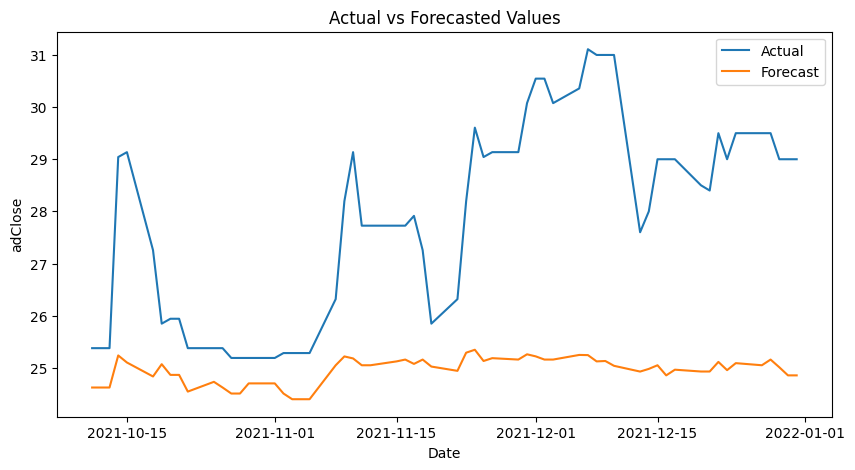

MAE: 2.9373494128200823
MSE: 11.557251306359813
MAPE: 10.158648849911067
RMSE: 3.399595756315714
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.995299   0.172414   0.076153    0.275958    1.154616 -2.196687  2.937349   

    Test_MSE  Test_RMSE  Test_MAPE  
0  11.557251   3.399596  10.158649  


In [ ]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'max_bin': 255,
    'min_data_in_leaf': 10,
    'min_sum_hessian_in_leaf': 1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.2,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.1,
    'max_depth': 5,
    'extra_trees': True,
    'path_smooth': 0.5,
}

func_lgb_model_train_test(df_train_qph, df_test_qph, params)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_by

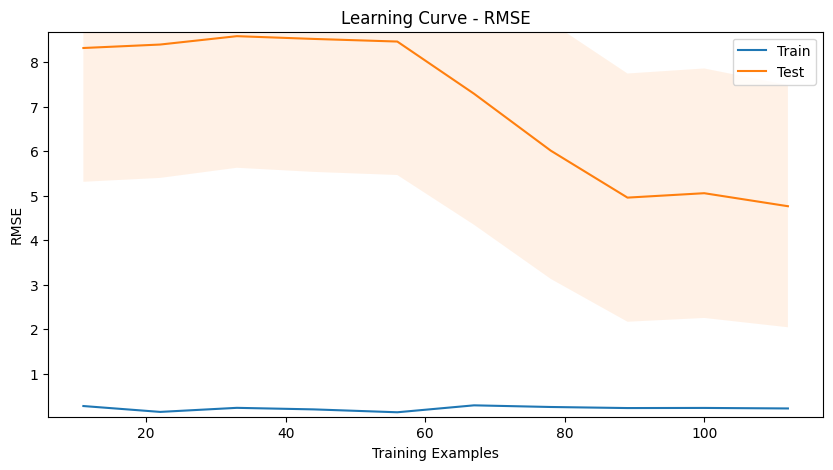

In [ ]:
func_lgb_model_train_test_learning_curve(df_train_qph, params)

#### **Hyperparameters Tuning**

In [ ]:
param_distributions = {
    'num_leaves': [5,6,7,10],
    'max_bin': [63, 96, 127, 255],
    # 'learning_rate': [0.05, 0.1, 0.2],
    # 'min_data_in_leaf': [5,6,7,8],
    # 'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1],
    # 'feature_fraction': [0.5, 0.6, 0.7],
    # 'bagging_fraction': [0.6, 0.7, 0.8],
    # 'bagging_freq': [2, 3, 4],
    'lambda_l1': [0.1, 0.2,0.15],
    'lambda_l2': [0.1, 0.2, 0.15],
    'min_gain_to_split': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'path_smooth': [0.1, 0.2, 0.3, 0.5],
}
print(func_gridsearchcv_tuning(df_train_qph, param_distributions))

<ipython-input-11-95c8ce723799>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_pct_1'] = data['adClose'].pct_change()
<ipython-input-11-95c8ce723799>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adclose_diff_1'] = data['adClose'].diff()
<ipython-input-11-95c8ce723799>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 1192, number of used features: 17
[LightGBM] [Info] Start training from score 15.950772


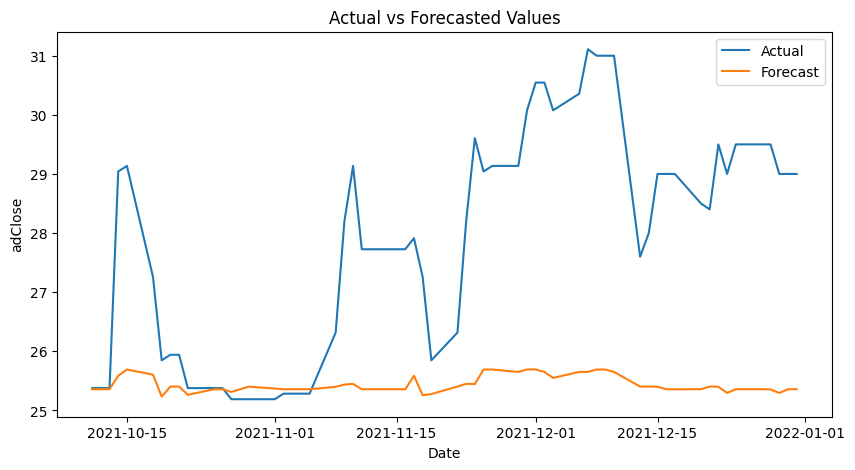

MAE: 2.4850210802587034
MSE: 9.319183845820232
MAPE: 8.512187935540721
RMSE: 3.052733831473067
   Train_R2  Train_MAE  Train_MSE  Train_RMSE  Train_MAPE   Test_R2  Test_MAE  \
0  0.999017   0.066326   0.015917    0.126162    0.489511 -1.577647  2.485021   

   Test_MSE  Test_RMSE  Test_MAPE  
0  9.319184   3.052734   8.512188  
Feature Importance:
             Feature  Importance
0         basicPrice          21
1       ceilingPrice          24
2         floorPrice           2
3               open          35
4               high          28
5                low          15
6              close          14
7            average           7
8             adOpen          16
9             adHigh          92
10             adLow          40
11         adAverage          55
12          nmVolume           7
13           nmValue          10
14          ptVolume           0
15           ptValue           0
16      close_diff_1           4
17  adAverage_diff_1           5
18   adAverage_pct_1   

In [ ]:
best_params = {'num_leaves': 5, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.2,
               'min_gain_to_split': 0.05, 'max_depth': 4, 'path_smooth': 0.3}
func_lgb_model_train_test(df_train_qph, df_test_qph, best_params)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.05, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.05
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[

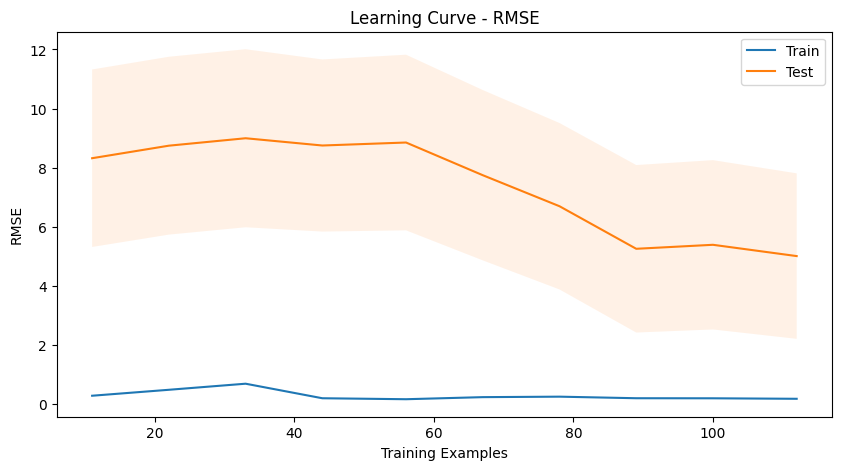

In [ ]:
best_params = {'num_leaves': 5, 'max_bin': 63, 'lambda_l1': 0.1, 'lambda_l2': 0.2,
               'min_gain_to_split': 0.05, 'max_depth': 4, 'path_smooth': 0.3}
func_lgb_model_train_test_learning_curve(df_train_qph, best_params)

# **Archived**

In [ ]:
# # Tuning gridsearch BWA
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# from lightgbm.sklearn import LGBMRegressor
# from tune_sklearn import TuneSearchCV
# from scipy.stats import randint
# from tune_sklearn import TuneGridSearchCV

# # specify features and target
# features = df_train_bwa.columns.drop('adClose')
# target = 'adClose'

# # create time series cross-validator
# tscv = TimeSeriesSplit(n_splits=10)

# # create LGBM model
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 10,
#     'learning_rate': 0.05,
#     'max_bin': 255,
#     'min_data_in_leaf': 10,
#     'min_sum_hessian_in_leaf': 1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l1': 0.2,
#     'lambda_l2': 0.2,
#     'min_gain_to_split': 0.1,
#     'max_depth': 5,
#     'extra_trees': True,
#     'path_smooth': 0,
# }

# # create LGBM dataset
# train_dataset = lgb.Dataset(df_train_bwa[features], label=df_train_bwa[target])

# # define the range of values for hyperparameters to be tuned
# param_distributions = {
#     'num_leaves': [3,4,5,6,7,8,9,10],
#     'max_bin': [4, 7, 15, 31, 63, 96, 127],
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'min_data_in_leaf': [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
#     'min_sum_hessian_in_leaf': [0.001, 0.01, 0.1, 1, 10, 100],
#     'feature_fraction': [0.5, 0.6, 0.7, 0.8],
#     'bagging_fraction': [0.5, 0.6, 0.7, 0.8],
#     'bagging_freq': [2, 3, 4, 5, 6, 7, 8],
#     'lambda_l1': [0, 0.1, 0.2, 0.05, 0.15, 0.25],
#     'lambda_l2': [0, 0.1, 0.2, 0.05, 0.15, 0.25],
#     'min_gain_to_split': [0.01, 0.05, 0.1, 0.2, 0.5],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'path_smooth': [0.1, 0.2, 0.3, 0.4, 0.5],
# }

# # create TuneSearchCV object

# # tune_search = TuneSearchCV(
# #     LGBMRegressor(**params),
# #     param_distributions=param_distributions,
# #     n_trials=100,
# #     scoring='neg_mean_squared_error',
# #     cv=tscv,
# #     n_jobs=-1,
# #     use_gpu=True
# # )


# # tune_search = TuneGridSearchCV(
# #     LGBMRegressor(**params),
# #     param_grid=param_distributions,
# #     # n_trials=100,
# #     scoring='neg_mean_squared_error',
# #     cv=tscv,
# #     n_jobs=-1,
# #     mode='min'
# # )

# # # perform hyperparameter tuning on the dataset
# # tune_search.fit(df_train_bwa[features], df_train_bwa[target])

# # # print the best hyperparameters
# # print(tune_search.best_params_)

# # # create LGBM model with best hyperparameters
# # best_params = tune_search.best_params_
# # best_model = LGBMRegressor(**best_params)

# # # train best model on the dataset
# # best_model.fit(df_train_bwa[features], df_train_bwa[target])

# # # make predictions on the test dataset using the best model
# # y_pred = best_model.predict(df_test_bwa[features])

# # # calculate root mean squared error of predictions
# # rmse = mean_squared_error(df_test_bwa[target], y_pred, squared=False)
# # print(f"Root Mean Square Error: {rmse}")

# # create a dataframe to store the results
# df_best_params_results = pd.DataFrame(columns=["best_params", "rmse"])

# for i in range(100):
#     # perform hyperparameter tuning on the dataset
#     tune_search = TuneSearchCV(
#         LGBMRegressor(),
#         param_distributions=param_distributions,
#         n_trials=1000,
#         scoring='neg_mean_squared_error',
#         cv=tscv,
#         n_jobs=-1,
#         mode='min'
#     )

#     # perform hyperparameter tuning on the dataset
#     tune_search.fit(df_train_bwa[features], df_train_bwa[target])

#     # print the best hyperparameters
#     print(f"Iteration {i+1} - Best Params: {tune_search.best_params_}")

#     # create LGBM model with best hyperparameters
#     best_params = tune_search.best_params_
#     best_model = LGBMRegressor(**best_params)

#     # train best model on the dataset
#     best_model.fit(df_train_bwa[features], df_train_bwa[target])

#     # make predictions on the test dataset using the best model
#     y_pred = best_model.predict(df_test_bwa[features])

#     # calculate root mean squared error of predictions
#     rmse = mean_squared_error(df_test_bwa[target], y_pred, squared=False)
#     print(f"Iteration {i+1} - Root Mean Square Error: {rmse}")

#     # add results to the dataframe
#     df_best_params_results = df_best_params_results.append({"best_params": best_params, "rmse": rmse}, ignore_index=True)


In [ ]:
# plot actual vs forecasted results

# # forecast of test set
# # make predictions on test data
# df_test_bwa['forecast'] = best_model.predict(df_test_bwa[features])

# # plot actual vs forecasted values
# plt.figure(figsize=(10,5))
# plt.plot(df_test_bwa[target], label='Actual')
# plt.plot(df_test_bwa['forecast'], label='Forecast')
# plt.legend()
# plt.title('Actual vs Forecasted Values')
# plt.xlabel('Date')
# plt.ylabel('adClose')
# plt.show()

# # calculate and print RMSE
# rmse = mean_squared_error(df_test_bwa[target], df_test_bwa['forecast'], squared=False)
# print(f'RMSE: {rmse}')

In [ ]:
# save model

# import pickle
# modelname="bwa_forecasting.zip"
# pickle.dump(best_model, open(modelname, 'wb'))
# # modelname="bwa_forecasting.zip"
# # trainedmodel=pickle.load(open(modelname, 'rb'))